# O Efeito da Experiência e Ferramentas na Compensação de Desenvolvedores

## Descrição do Projeto

Este projeto investiga os fatores que influenciam a compensação financeira de desenvolvedores de software, com base nos dados globais da pesquisa Stack Overflow de 2023. O fenômeno central da análise é entender como a experiência profissional (`YearsCodePro`) e a escolha de ferramentas, especificamente os Sistemas Operacionais (SO), se correlacionam a compensação anual (`ConvertedCompYearly`).

A partir dos dados da pesquisa, exploraremos:

* A distribuição e a variabilidade da compensação anual e anos de experiência profissional entre desenvolvedores.
* O impacto direto dos anos de experiência profissional sobre os níveis de remuneração.
* A existência de diferenças salariais estatisticamente significativas entre desenvolvedores que utilizam diferentes SOs.
* Identificar quais SOs estão associados aos maiores e menores salários.

Os dados serão cuidadosamente pré-processados, com tratamento de valores ausentes, conversão de tipos de dados para análise numérica e limpeza de outliers que possam distorcer os resultados. A análise descritiva buscará revelar os padrões de remuneração e uso de ferramentas na comunidade de desenvolvimento, enquanto os testes de hipóteses irão validar formalmente as diferenças observadas.

O objetivo final é fornecer insights claros sobre como a progressão na carreira e a especialização em certas ferramentas se refletem no potencial de ganhos de um profissional de tecnologia, com aplicações para orientação de carreira, negociação salarial e entendimento de tendências de mercado.

## Dependências

In [1]:
!pip install pandas seaborn matplotlib numpy scikit-learn scipy statsmodels


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl
import scipy
from statsmodels import api as sm

## Pré-processamento dos Dados e Análise Descritiva

Nesta seção, realizamos a preparação e limpeza dos dados da pesquisa **Stack Overflow 2023** para garantir a qualidade e a precisão da análise. As etapas incluem:

* **Seleção de Variáveis de Interesse:** Foco nas colunas essenciais para o escopo do projeto, como `YearsCodePro`, `ConvertedCompYearly` e as colunas relacionadas aos Sistemas Operacionais (SO).

* **Análise e Conversão de Tipos:** Transformação de colunas de texto (`object`) para formatos numéricos. Por exemplo, `YearsCodePro` e `ConvertedCompYearly` são convertidos para números para possibilitar cálculos estatísticos.

* **Tratamento de Dados Ausentes (`NaN`):** Remoção de linhas onde informações cruciais para a análise (como salário ou anos de experiência) não foram preenchidas, evitando distorções nos resultados.

* **Processamento de Colunas Categóricas:** Simplificação e agrupamento de dados em colunas com múltiplas respostas (como a de tecnologias), para permitir comparações claras e eficazes.

* **Limpeza de Outliers:** Identificação e remoção de valores extremos e irreais na coluna de salários (`ConvertedCompYearly`), que poderiam enviesar as médias e outras métricas descritivas.

* **Discretização de Colunas:**  Para facilitar a análise e a visualização de tendências, a variável numérica contínua ConvertedCompYearly foi convertida em uma variável categórica.

* **Normalização de Dados (Min-Max Scaling):** Como etapa de preparação para modelagem de machine learning, as principais variáveis numéricas (YearsCodePro e ConvertedCompYearly) foram normalizadas. 

In [3]:
path_arquivo : str = "../dados/2023/survey_results_public.csv"
df : pd.DataFrame = pd.read_csv(path_arquivo, sep = ',')
print(f"Tamanho do dataset: {len(df)}")
df.head(5)

Tamanho do dataset: 89184


ResponseId     Q120                      MainBranch              Age  \
0           1  I agree                   None of these  18-24 years old   
1           2  I agree  I am a developer by profession  25-34 years old   
2           3  I agree  I am a developer by profession  45-54 years old   
3           4  I agree  I am a developer by profession  25-34 years old   
4           5  I agree  I am a developer by profession  25-34 years old   

                                          Employment  \
0                                                NaN   
1                                Employed, full-time   
2                                Employed, full-time   
3                                Employed, full-time   
4  Employed, full-time;Independent contractor, fr...   

                             RemoteWork  \
0                                   NaN   
1                                Remote   
2  Hybrid (some remote, some in-person)   
3  Hybrid (some remote, some in-person)   
4                                Remote   

                                    CodingActivities  \
0                                                NaN   
1  Hobby;Contribute to open-source projects;Boots...   
2  Hobby;Professional development or self-paced l...   
3                                              Hobby   
4  Hobby;Contribute to open-source projects;Profe...   

                                        EdLevel  \
0                                           NaN   
1  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                           LearnCode  \
0                                                NaN   
1  Books / Physical media;Colleague;Friend or fam...   
2  Books / Physical media;Colleague;On the job tr...   
3  Colleague;Friend or family member;Other online...   
4  Books / Physical media;Online Courses or Certi...   

                                     LearnCodeOnline  ...        Frequency_1  \
0                                                NaN  ...                NaN   
1  Formal documentation provided by the owner of ...  ...   1-2 times a week   
2  Formal documentation provided by the owner of ...  ...  6-10 times a week   
3  Formal documentation provided by the owner of ...  ...   1-2 times a week   
4  Formal documentation provided by the owner of ...  ...   1-2 times a week   

         Frequency_2       Frequency_3         TimeSearching  \
0                NaN               NaN                   NaN   
1   10+ times a week             Never   15-30 minutes a day   
2  6-10 times a week  3-5 times a week   30-60 minutes a day   
3   10+ times a week  1-2 times a week   15-30 minutes a day   
4   1-2 times a week  3-5 times a week  60-120 minutes a day   

         TimeAnswering                                   ProfessionalTech  \
0                  NaN                                                NaN   
1  15-30 minutes a day  DevOps function;Microservices;Automated testin...   
2  30-60 minutes a day  DevOps function;Microservices;Automated testin...   
3  30-60 minutes a day  Automated testing;Continuous integration (CI) ...   
4  30-60 minutes a day  Microservices;Automated testing;Observability ...   

                                            Industry           SurveyLength  \
0                                                NaN                    NaN   
1  Information Services, IT, Software Development...  Appropriate in length   
2  Information Services, IT, Software Development...  Appropriate in length   
3                                                NaN  Appropriate in length   
4                                              Other  Appropriate in length   

                   SurveyEase ConvertedCompYearly  
0                         NaN                 NaN  
1                        Easy            285000.0  
2              

In [4]:
colunas_interesse : list[str] = ["ResponseId","YearsCodePro","OpSysProfessional use","ConvertedCompYearly"]
df_proc : pd.DataFrame = df[colunas_interesse].copy()
print(f"Tamanho do dataset: {len(df_proc)}")
df_proc = df_proc.replace('NaN', pd.NA).dropna()
print(f"Tamanho do dataset: {len(df_proc)}")
mascara_other: pd.Series = df_proc['OpSysProfessional use'].str.contains("Other (Please Specify):", regex=False, na=False)
df_proc = df_proc[~mascara_other].copy()
print(f"Tamanho do dataset: {len(df_proc)}")
df_proc['OpSysProfessionalList'] = df_proc['OpSysProfessional use'].str.split(';').apply(lambda lista: {os.strip() for os in lista if os.strip()})
# Isso poderia ser um HashMap para melhorar performance.
linux_identifiers = [
    'Arch', 
    'Debian', 
    'Fedora', 
    'Other Linux-based', 
    'Red Hat', 
    'Ubuntu', 
    'Windows Subsystem for Linux (WSL)'
]
windows_identifiers = [
    'Windows',
    'Cygwin'
]
apple_identifiers = [
    'MacOS',
    'iOS',
    'iPadOS'
]
mobile_identifiers = [
    'Android',
    'ChromeOS'
]
unix_like_identifiers = [
    'AIX',
    'BSD',
    'Solaris',
    'Haiku'
]
def map_os_set_to_detailed_groups(os_set):
    groups = set()
    for os_name in os_set:
        if os_name in linux_identifiers:
            groups.add('Linux Ecosystem')
        elif os_name in windows_identifiers:
            groups.add('Windows Ecosystem')
        elif os_name in apple_identifiers:
            groups.add('Apple Ecosystem')
        elif os_name in mobile_identifiers:
            groups.add('Mobile (Android/ChromeOS)')
        elif os_name in unix_like_identifiers:
            groups.add('Unix-like & Niche')
    return groups
df_proc['OpSysProfessionalGroup'] = df_proc['OpSysProfessionalList'].apply(map_os_set_to_detailed_groups)
df_proc.head(10)


Tamanho do dataset: 89184
Tamanho do dataset: 44876
Tamanho do dataset: 43979


ResponseId      YearsCodePro  \
1            2                 9   
2            3                23   
3            4                 7   
5            6                21   
6            7                 3   
7            8                 3   
8            9                15   
11          12                 9   
12          13                 9   
13          14  Less than 1 year   

                               OpSysProfessional use  ConvertedCompYearly  \
1    MacOS;Windows;Windows Subsystem for Linux (WSL)             285000.0   
2                            MacOS;Other Linux-based             250000.0   
3                                   iOS;iPadOS;MacOS             156000.0   
5                                              MacOS              96828.0   
6                                              MacOS             135000.0   
7                               MacOS;Ubuntu;Windows              80000.0   
8   Ubuntu;Windows;Windows Subsystem for Linux (WSL)              64254.0   
11                                           Windows              78003.0   
12                                Arch;Debian;Ubuntu              75000.0   
13                                      MacOS;Ubuntu             150000.0   

                                OpSysProfessionalList  \
1   {Windows Subsystem for Linux (WSL), MacOS, Win...   
2                          {Other Linux-based, MacOS}   
3                                {iOS, MacOS, iPadOS}   
5                                             {MacOS}   
6                                             {MacOS}   
7                            {Ubuntu, MacOS, Windows}   
8   {Windows Subsystem for Linux (WSL), Ubuntu, Wi...   
11                                          {Windows}   
12                             {Arch, Debian, Ubuntu}   
13                                    {Ubuntu, MacOS}   

                               OpSysProfessionalGroup  
1   {Windows Ecosystem, Linux Ecosystem, Apple Eco...  
2                  {Linux Ecosystem, Apple Ecosystem}  
3                                   {Apple Ecosystem}  
5                                   {Apple Ecosystem}  
6                                   {Apple Ecosystem}  
7   {Windows Ecosystem, Linux Ecosystem, Apple Eco...  
8                {Windows Ecosystem, Linux Ecosystem}  
11                                {Windows Ecosystem}  
12                                  {Linux Ecosystem}  
13                 {Linux Ecosystem, Apple Ecosystem}

In [5]:
tipos_de_dados = {
    'YearsCodePro': 'int32',
    'ConvertedCompYearly': 'int64',
    'OpSysProfessional use': 'category'
}
df_proc['YearsCodePro'] = df_proc['YearsCodePro'].replace({
    'Less than 1 year': 0,
    'More than 50 years': 51
})
df_proc = df_proc.astype(tipos_de_dados)
df_proc.head(10)

ResponseId  YearsCodePro  \
1            2             9   
2            3            23   
3            4             7   
5            6            21   
6            7             3   
7            8             3   
8            9            15   
11          12             9   
12          13             9   
13          14             0   

                               OpSysProfessional use  ConvertedCompYearly  \
1    MacOS;Windows;Windows Subsystem for Linux (WSL)               285000   
2                            MacOS;Other Linux-based               250000   
3                                   iOS;iPadOS;MacOS               156000   
5                                              MacOS                96828   
6                                              MacOS               135000   
7                               MacOS;Ubuntu;Windows                80000   
8   Ubuntu;Windows;Windows Subsystem for Linux (WSL)                64254   
11                                           Windows                78003   
12                                Arch;Debian;Ubuntu                75000   
13                                      MacOS;Ubuntu               150000   

                                OpSysProfessionalList  \
1   {Windows Subsystem for Linux (WSL), MacOS, Win...   
2                          {Other Linux-based, MacOS}   
3                                {iOS, MacOS, iPadOS}   
5                                             {MacOS}   
6                                             {MacOS}   
7                            {Ubuntu, MacOS, Windows}   
8   {Windows Subsystem for Linux (WSL), Ubuntu, Wi...   
11                                          {Windows}   
12                             {Arch, Debian, Ubuntu}   
13                                    {Ubuntu, MacOS}   

                               OpSysProfessionalGroup  
1   {Windows Ecosystem, Linux Ecosystem, Apple Eco...  
2                  {Linux Ecosystem, Apple Ecosystem}  
3                                   {Apple Ecosystem}  
5                                   {Apple Ecosystem}  
6                                   {Apple Ecosystem}  
7   {Windows Ecosystem, Linux Ecosystem, Apple Eco...  
8                {Windows Ecosystem, Linux Ecosystem}  
11                                {Windows Ecosystem}  
12                                  {Linux Ecosystem}  
13                 {Linux Ecosystem, Apple Ecosystem}

In [6]:
os_dummies:  pd.DataFrame= df_proc['OpSysProfessional use'].str.get_dummies(sep=";")
os_dummies = os_dummies.astype(bool)
df_proc = pd.concat([df_proc, os_dummies], axis=1)
df_proc.head(10)

ResponseId  YearsCodePro  \
1            2             9   
2            3            23   
3            4             7   
5            6            21   
6            7             3   
7            8             3   
8            9            15   
11          12             9   
12          13             9   
13          14             0   

                               OpSysProfessional use  ConvertedCompYearly  \
1    MacOS;Windows;Windows Subsystem for Linux (WSL)               285000   
2                            MacOS;Other Linux-based               250000   
3                                   iOS;iPadOS;MacOS               156000   
5                                              MacOS                96828   
6                                              MacOS               135000   
7                               MacOS;Ubuntu;Windows                80000   
8   Ubuntu;Windows;Windows Subsystem for Linux (WSL)                64254   
11                                           Windows                78003   
12                                Arch;Debian;Ubuntu                75000   
13                                      MacOS;Ubuntu               150000   

                                OpSysProfessionalList  \
1   {Windows Subsystem for Linux (WSL), MacOS, Win...   
2                          {Other Linux-based, MacOS}   
3                                {iOS, MacOS, iPadOS}   
5                                             {MacOS}   
6                                             {MacOS}   
7                            {Ubuntu, MacOS, Windows}   
8   {Windows Subsystem for Linux (WSL), Ubuntu, Wi...   
11                                          {Windows}   
12                             {Arch, Debian, Ubuntu}   
13                                    {Ubuntu, MacOS}   

                               OpSysProfessionalGroup    AIX  Android   Arch  \
1   {Windows Ecosystem, Linux Ecosystem, Apple Eco...  False    False  False   
2                  {Linux Ecosystem, Apple Ecosystem}  False    False  False   
3                                   {Apple Ecosystem}  False    False  False   
5                                   {Apple Ecosystem}  False    False  False   
6                                   {Apple Ecosystem}  False    False  False   
7   {Windows Ecosystem, Linux Ecosystem, Apple Eco...  False    False  False   
8                {Windows Ecosystem, Linux Ecosystem}  False    False  False   
11                                {Windows Ecosystem}  False    False  False   
12                                  {Linux Ecosystem}  False    False   True   
13                 {Linux Ecosystem, Apple Ecosystem}  False    False  False   

      BSD  ...  Haiku  MacOS  Other Linux-based  Red Hat  Solaris  Ubuntu  \
1   False  ...  False   True              False    False    False   False   
2   False  ...  False   True               True    False    False   False   
3   False  ...  False   True              False    False    False   False   
5   False  ...  False   True              False    False    False   False   
6   False  ...  False   True              False    False    False   False   
7   False  ...  False   True              False    False    False    True   
8   False  ...  False  False              False    False    False    True   
11  False  ...  False  False              False    False    False   False   
12  False  ...  False  False              False    False    False    True   
13  False  ...  False   True              False    False    False    True   

    Windows  Windows Subsystem for Linux (WSL)    iOS  iPadOS  
1      True                               True  False   False  
2     False                              False  False   False  
3     False                              False   True    True  
5     False                              False  False   False  
6     False                              False  False   False  
7      True                              False  False   False 

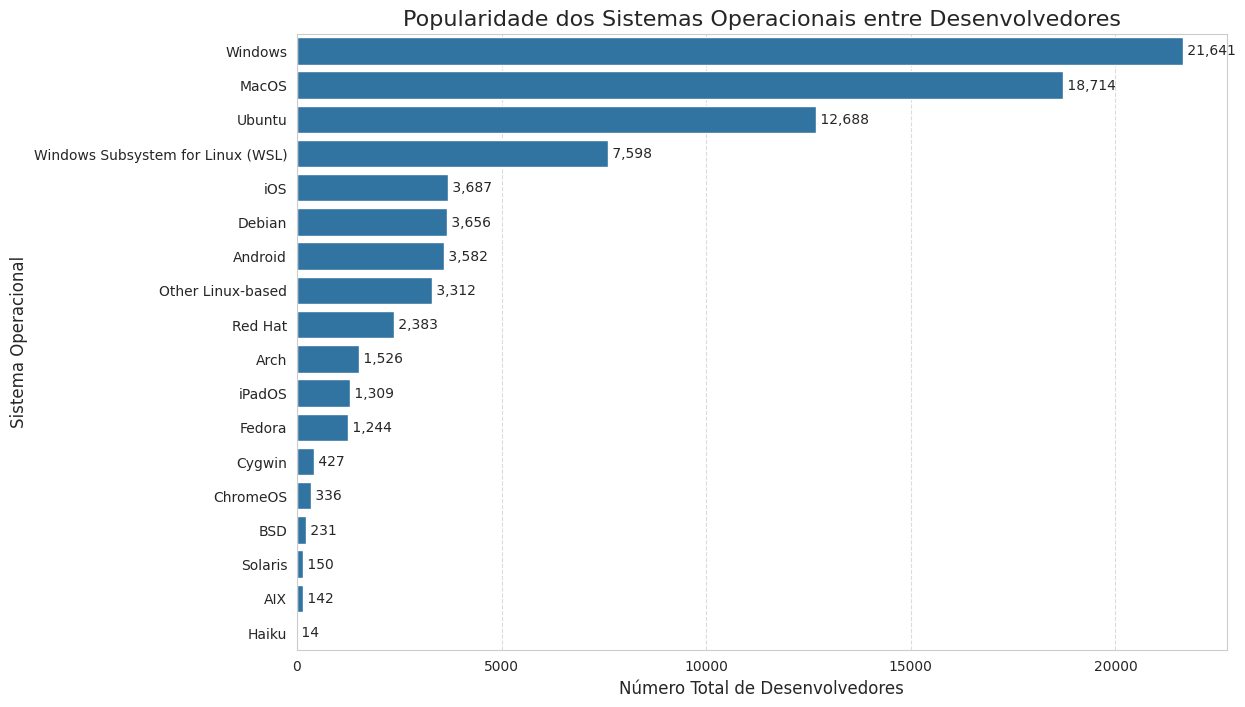

In [7]:
lista_de_tecnologias = os_dummies.columns
contagem_por_tecnologia = df_proc[lista_de_tecnologias].sum()
contagem_ordenada = contagem_por_tecnologia.sort_values(ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x=contagem_ordenada.values, y=contagem_ordenada.index, orient='h')
plt.title('Popularidade dos Sistemas Operacionais entre Desenvolvedores', fontsize=16)
plt.xlabel('Número Total de Desenvolvedores', fontsize=12)
plt.ylabel('Sistema Operacional', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
for index, value in enumerate(contagem_ordenada):
    plt.text(value, index, f' {value:,}', va='center')
plt.show()

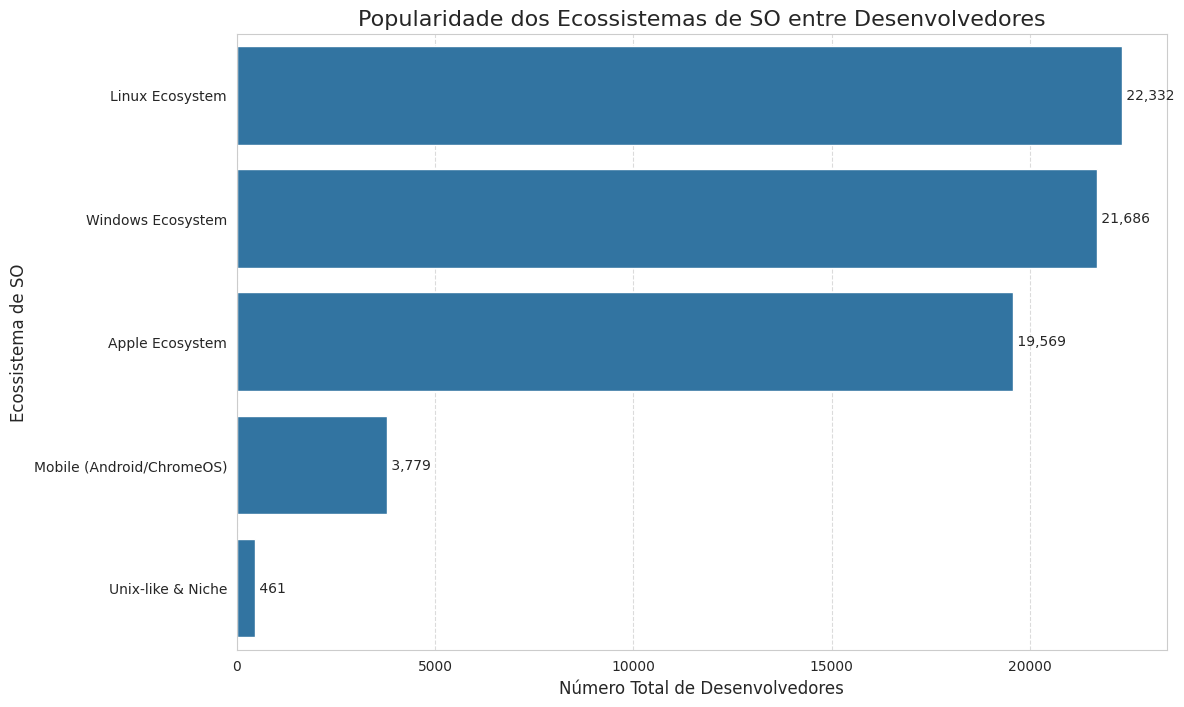

In [8]:
contagem_grupos = df_proc['OpSysProfessionalGroup'].explode().value_counts()
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.barplot(x=contagem_grupos.values, y=contagem_grupos.index, orient='h')
plt.title('Popularidade dos Ecossistemas de SO entre Desenvolvedores', fontsize=16)
plt.xlabel('Número Total de Desenvolvedores', fontsize=12)
plt.ylabel('Ecossistema de SO', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
for index, value in enumerate(contagem_grupos):
    plt.text(value, index, f' {value:,}', va='center')
plt.show()

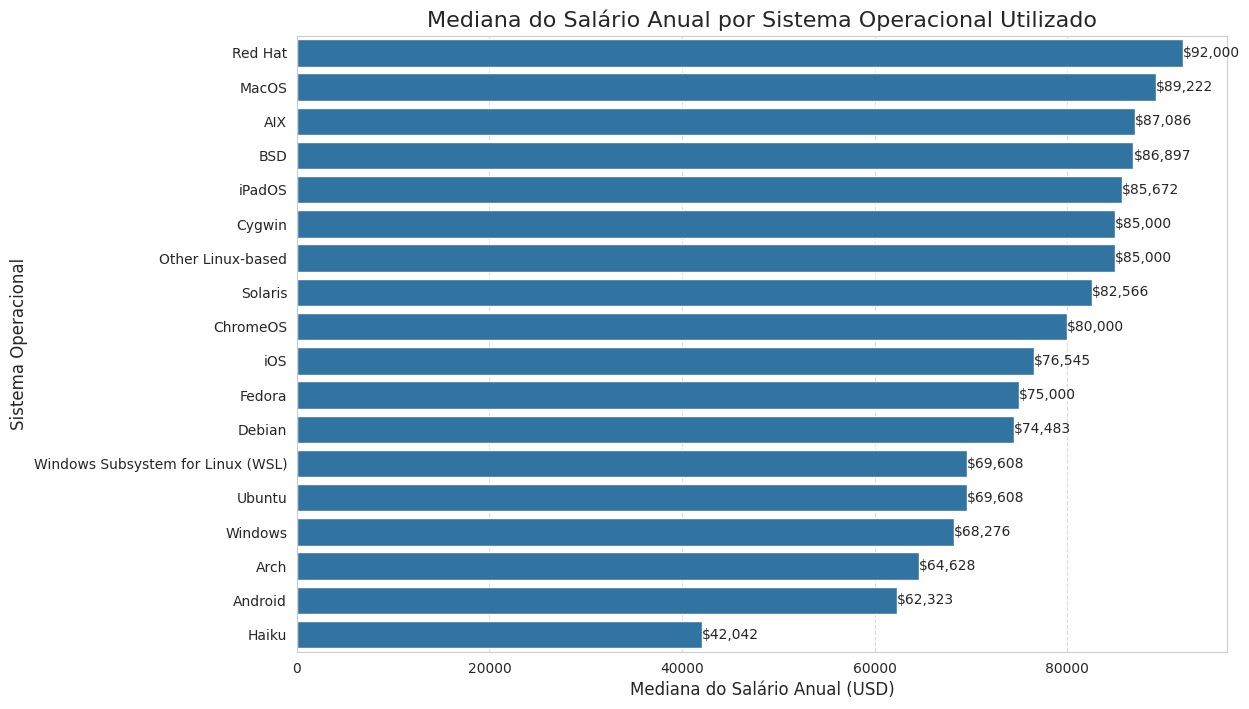

In [9]:
salario_mediano_por_so = {}

# Iteramos sobre cada coluna de tecnologia (cada SO)
for so in lista_de_tecnologias:
    desenvolvedores_com_so = df_proc[df_proc[so]]
    mediana = desenvolvedores_com_so['ConvertedCompYearly'].median()
    salario_mediano_por_so[so] = mediana

salario_mediano_series = pd.Series(salario_mediano_por_so).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=salario_mediano_series.values, y=salario_mediano_series.index, orient='h')
plt.title('Mediana do Salário Anual por Sistema Operacional Utilizado', fontsize=16)
plt.xlabel('Mediana do Salário Anual (USD)', fontsize=12)
plt.ylabel('Sistema Operacional', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
for index, value in enumerate(salario_mediano_series):
    label = f'${value:,.0f}'
    plt.text(value, index, label, va='center')

plt.show()

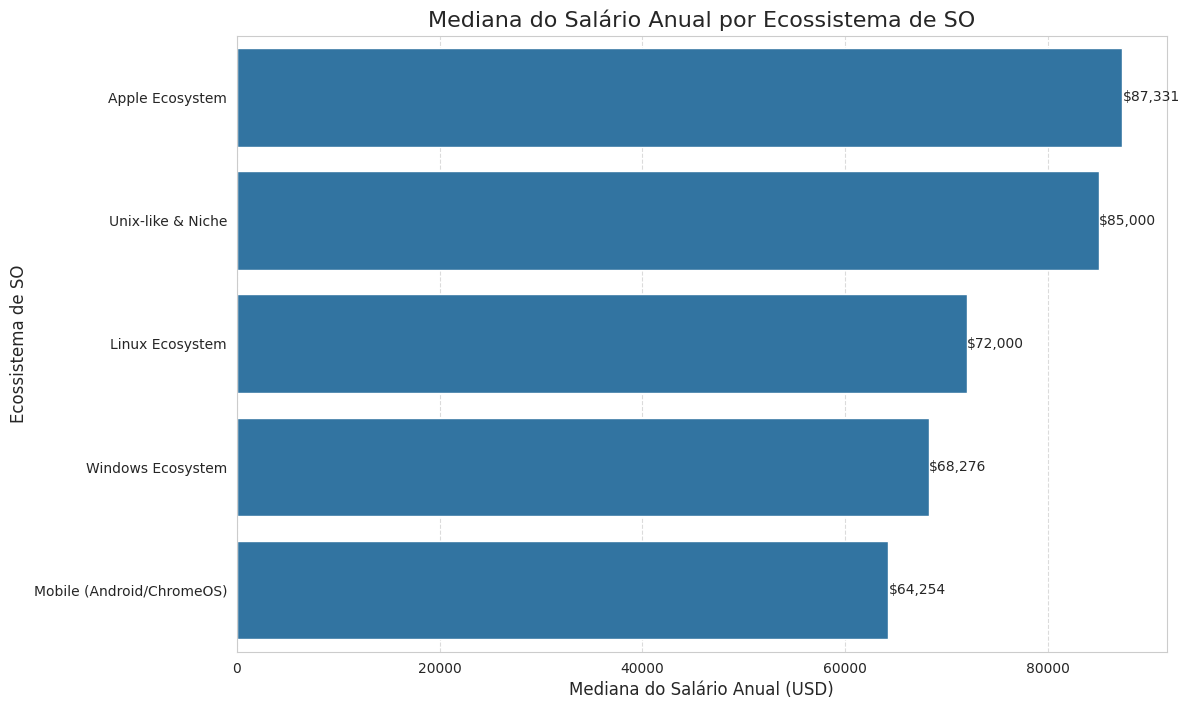

In [10]:
salario_mediano_por_grupo = df_proc.explode('OpSysProfessionalGroup').groupby('OpSysProfessionalGroup')['ConvertedCompYearly'].median().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=salario_mediano_por_grupo.values, y=salario_mediano_por_grupo.index, orient='h')
plt.title('Mediana do Salário Anual por Ecossistema de SO', fontsize=16)
plt.xlabel('Mediana do Salário Anual (USD)', fontsize=12)
plt.ylabel('Ecossistema de SO', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
for index, value in enumerate(salario_mediano_por_grupo):
    label = f'${value:,.0f}'
    plt.text(value, index, label, va='center')
plt.show()

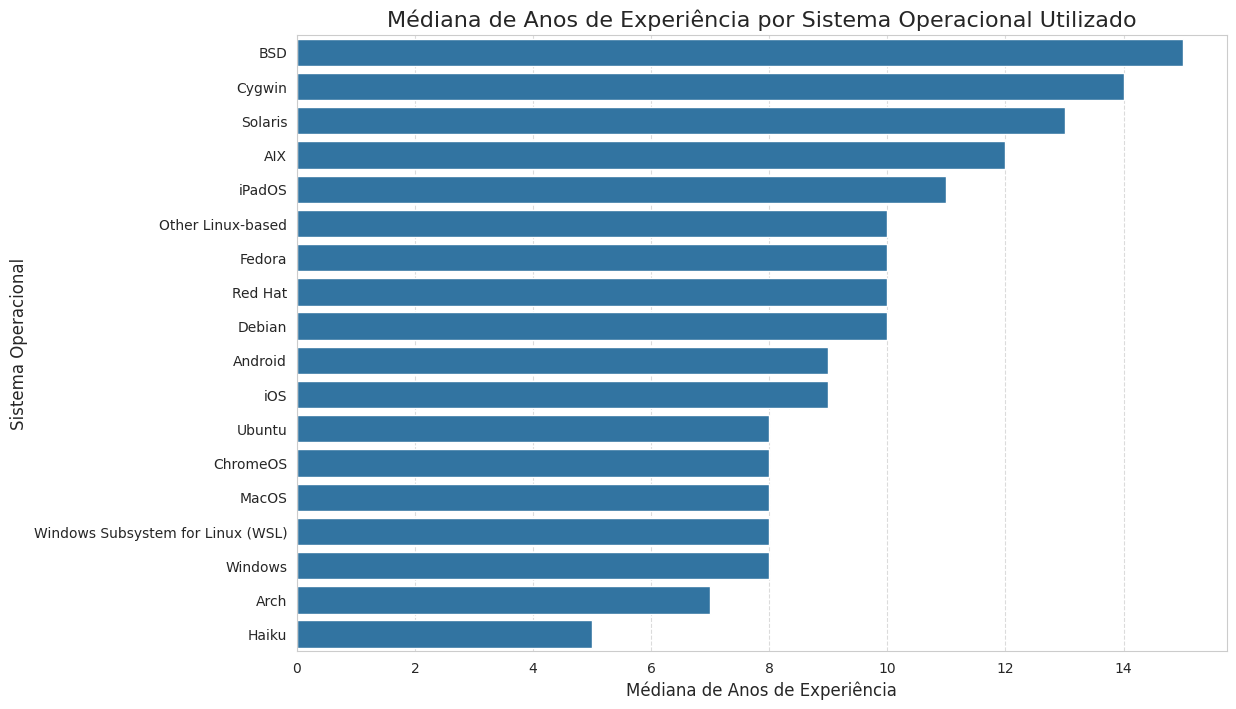

In [11]:
experiencia_mediana_por_so = {}
for so in lista_de_tecnologias:
    desenvolvedores_com_so = df_proc[df_proc[so]]
    mediana_exp = desenvolvedores_com_so['YearsCodePro'].median()
    experiencia_mediana_por_so[so] = mediana_exp
experiencia_mediana_series = pd.Series(experiencia_mediana_por_so).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
ax_exp = sns.barplot(x=experiencia_mediana_series.values, y=experiencia_mediana_series.index, orient='h')
plt.title('Médiana de Anos de Experiência por Sistema Operacional Utilizado', fontsize=16)
plt.xlabel('Médiana de Anos de Experiência', fontsize=12)
plt.ylabel('Sistema Operacional', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

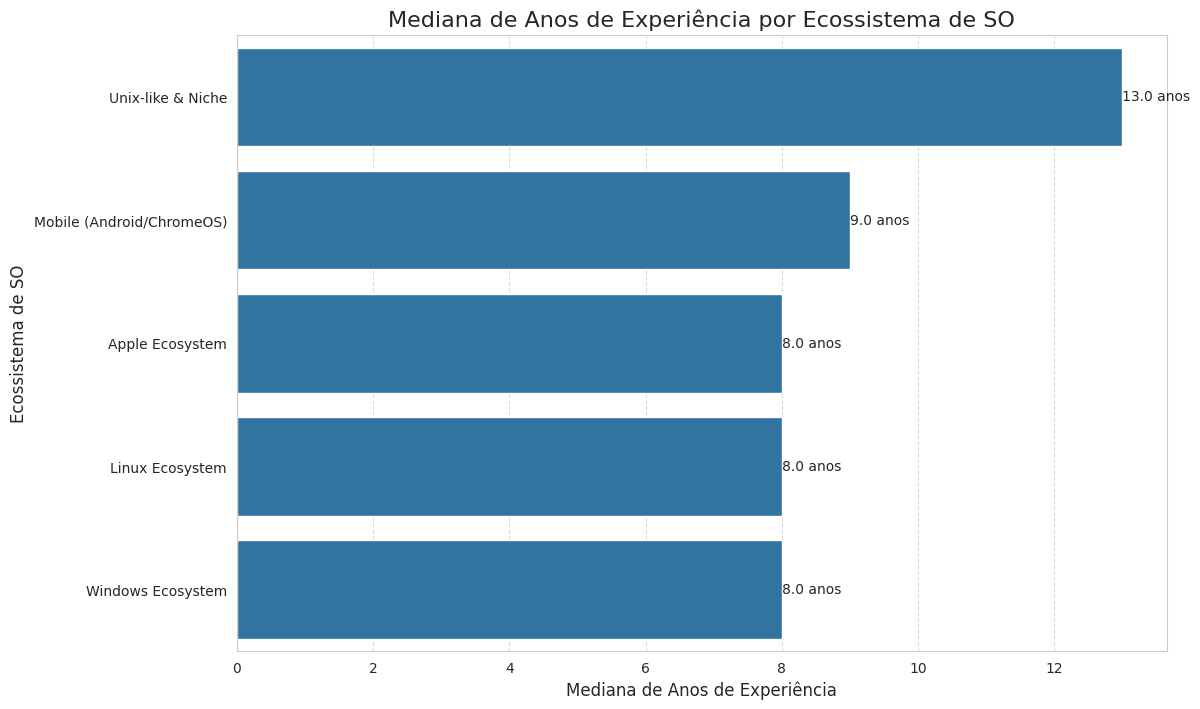

In [12]:
experiencia_mediana_por_grupo = df_proc.explode('OpSysProfessionalGroup').groupby('OpSysProfessionalGroup')['YearsCodePro'].median().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=experiencia_mediana_por_grupo.values, y=experiencia_mediana_por_grupo.index, orient='h')
plt.title('Mediana de Anos de Experiência por Ecossistema de SO', fontsize=16)
plt.xlabel('Mediana de Anos de Experiência', fontsize=12)
plt.ylabel('Ecossistema de SO', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
for index, value in enumerate(experiencia_mediana_por_grupo):
    label = f'{value:.1f} anos'
    plt.text(value, index, label, va='center')

plt.show()

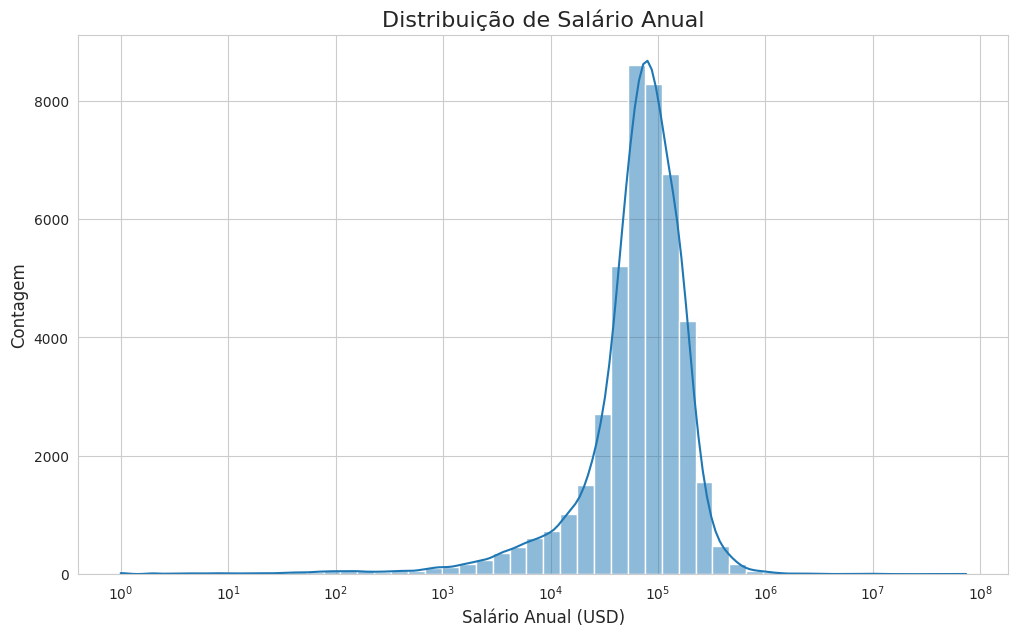

In [13]:
plt.figure(figsize=(12, 7))
sns.histplot(data=df_proc, x='ConvertedCompYearly', bins=50, log_scale=True, kde=True)
plt.title('Distribuição de Salário Anual', fontsize=16)
plt.xlabel('Salário Anual (USD)', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.show()

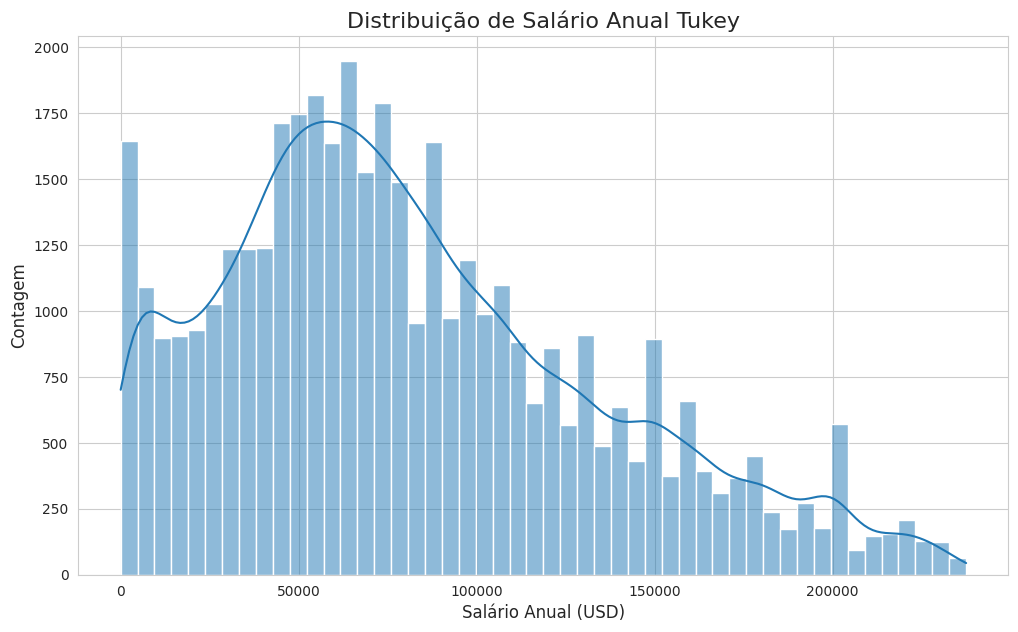

In [14]:
Q1 = df_proc['ConvertedCompYearly'].quantile(0.25)
Q3 = df_proc['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
limite_superior_tukey = Q3 + 1.5 * IQR
limite_inferior_tukey = Q1 - 1.5 * IQR
df_proc_tukey_salario = df_proc[(df_proc['ConvertedCompYearly'] <= limite_superior_tukey) & (df_proc['ConvertedCompYearly'] >= limite_inferior_tukey)].copy()
plt.figure(figsize=(12, 7))
sns.histplot(data=df_proc_tukey_salario, x='ConvertedCompYearly', bins=50, kde=True)
plt.title('Distribuição de Salário Anual Tukey', fontsize=16)
plt.xlabel('Salário Anual (USD)', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.show()

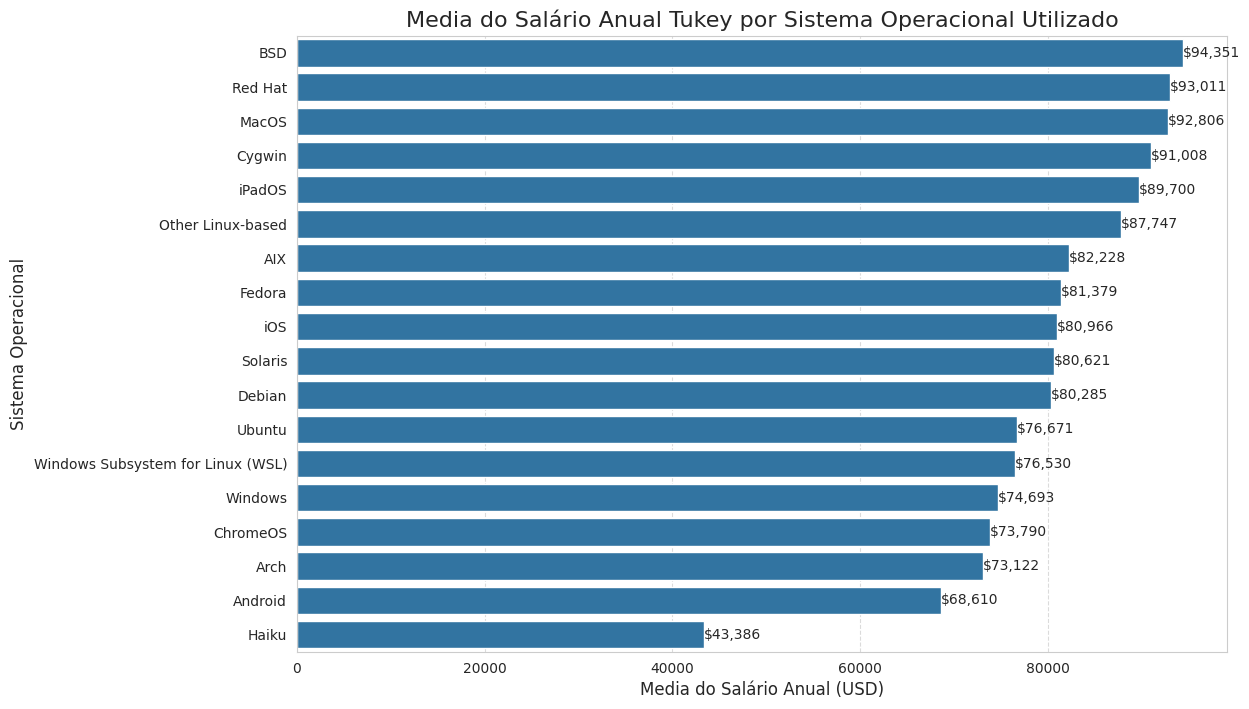

In [15]:
salario_media_por_so = {}

# Iteramos sobre cada coluna de tecnologia (cada SO)
for so in lista_de_tecnologias:
    desenvolvedores_com_so = df_proc_tukey_salario[df_proc_tukey_salario[so]]
    mediana = desenvolvedores_com_so['ConvertedCompYearly'].mean()
    salario_media_por_so[so] = mediana

salario_media_series = pd.Series(salario_media_por_so).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=salario_media_series.values, y=salario_media_series.index, orient='h')
plt.title('Media do Salário Anual Tukey por Sistema Operacional Utilizado', fontsize=16)
plt.xlabel('Media do Salário Anual (USD)', fontsize=12)
plt.ylabel('Sistema Operacional', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
for index, value in enumerate(salario_media_series):
    label = f'${value:,.0f}'
    plt.text(value, index, label, va='center')

plt.show()

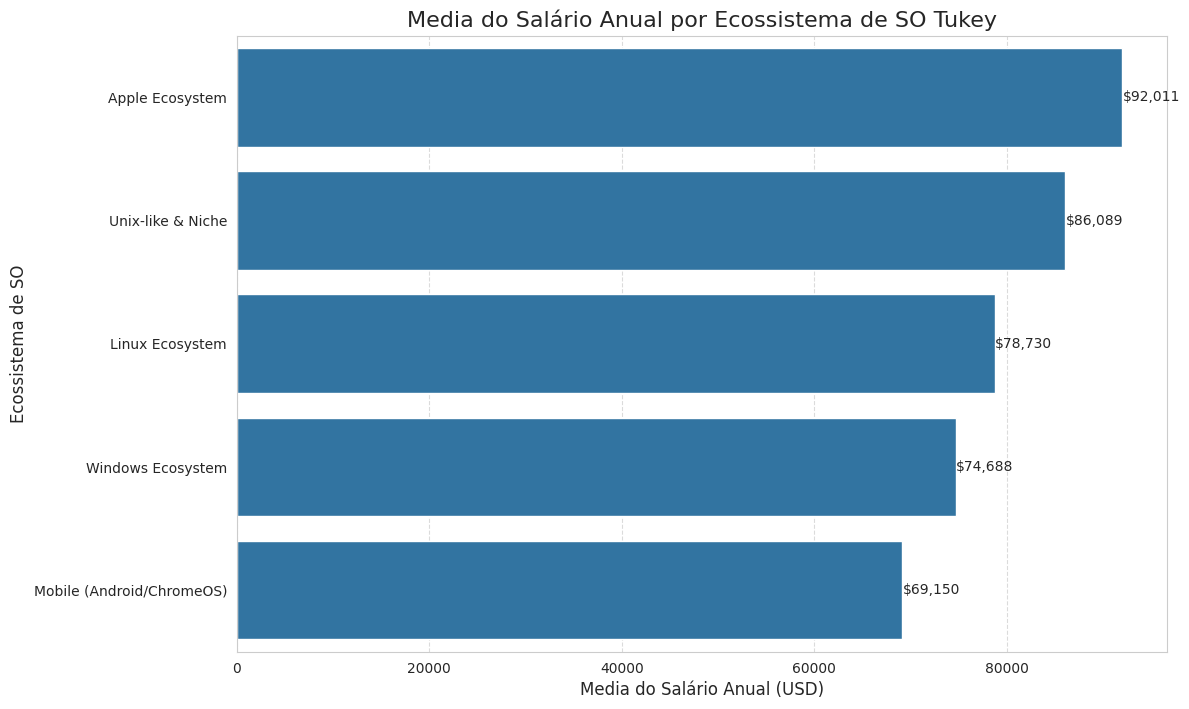

In [16]:
salario_media_por_grupo = df_proc_tukey_salario.explode('OpSysProfessionalGroup').groupby('OpSysProfessionalGroup')['ConvertedCompYearly'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=salario_media_por_grupo.values, y=salario_media_por_grupo.index, orient='h')
plt.title('Media do Salário Anual por Ecossistema de SO Tukey', fontsize=16)
plt.xlabel('Media do Salário Anual (USD)', fontsize=12)
plt.ylabel('Ecossistema de SO', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
for index, value in enumerate(salario_media_por_grupo):
    label = f'${value:,.0f}'
    plt.text(value, index, label, va='center')
plt.show()

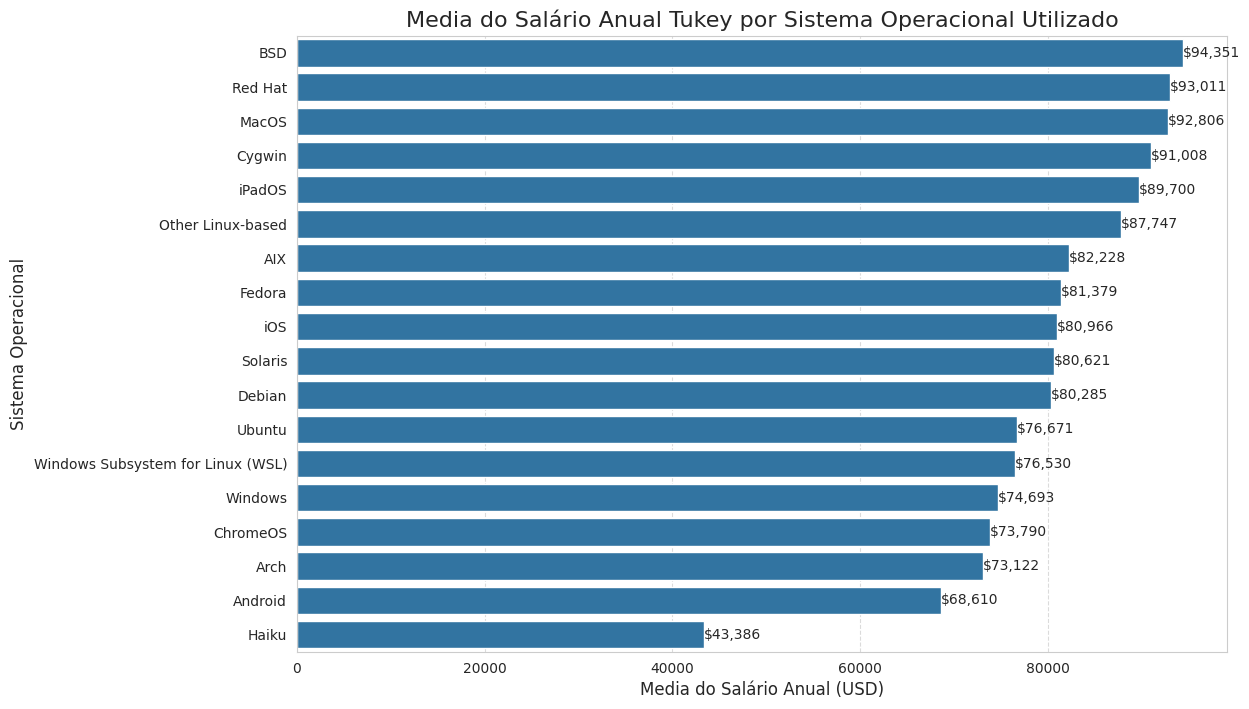

In [17]:
salario_media_por_so = {}

# Iteramos sobre cada coluna de tecnologia (cada SO)
for so in lista_de_tecnologias:
    desenvolvedores_com_so = df_proc_tukey_salario[df_proc_tukey_salario[so]]
    mediana = desenvolvedores_com_so['ConvertedCompYearly'].mean()
    salario_media_por_so[so] = mediana

salario_media_series = pd.Series(salario_media_por_so).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=salario_media_series.values, y=salario_media_series.index, orient='h')
plt.title('Media do Salário Anual Tukey por Sistema Operacional Utilizado', fontsize=16)
plt.xlabel('Media do Salário Anual (USD)', fontsize=12)
plt.ylabel('Sistema Operacional', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
for index, value in enumerate(salario_media_series):
    label = f'${value:,.0f}'
    plt.text(value, index, label, va='center')
plt.show()

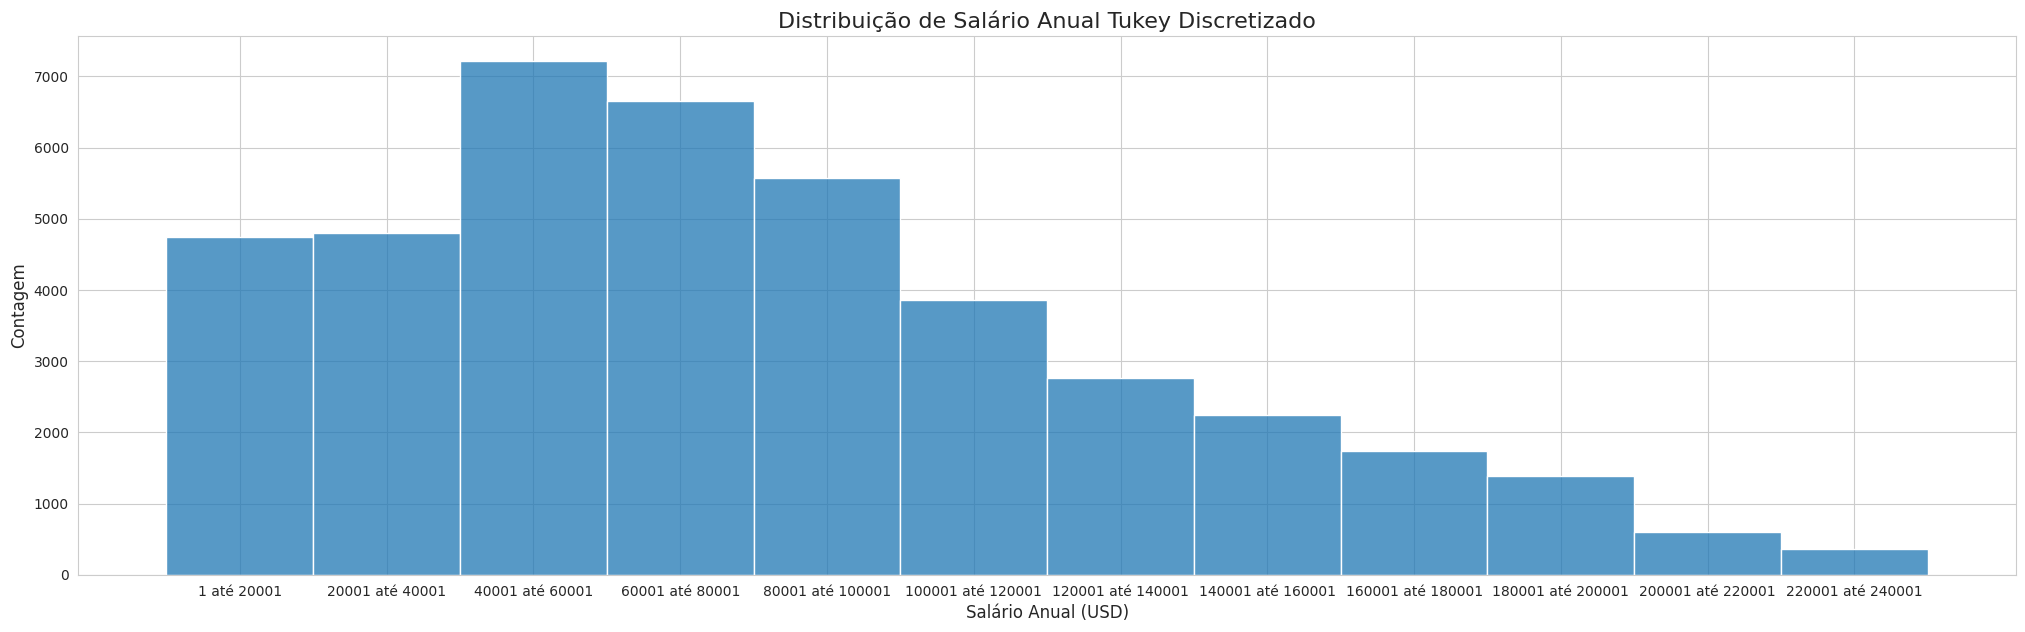

In [18]:
limites_dinamicos = np.arange(df_proc_tukey_salario['ConvertedCompYearly'].min(),  df_proc_tukey_salario['ConvertedCompYearly'].max() + 20000, 20000)
rotulos_dinamicos = [f"{limites_dinamicos[i]:.0f} até {limites_dinamicos[i+1]:.0f}" for i in range(len(limites_dinamicos) - 1)]
df_proc_tukey_salario['ConvertedCompYearlyDisc'] = pd.cut(
    df_proc_tukey_salario['ConvertedCompYearly'],
    bins= limites_dinamicos,
    labels=rotulos_dinamicos,
    right=False,
    include_lowest=True
)
plt.figure(figsize=(25, 7))
sns.histplot(data=df_proc_tukey_salario, x='ConvertedCompYearlyDisc')
plt.title('Distribuição de Salário Anual Tukey Discretizado', fontsize=16)
plt.xlabel('Salário Anual (USD)', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.show()

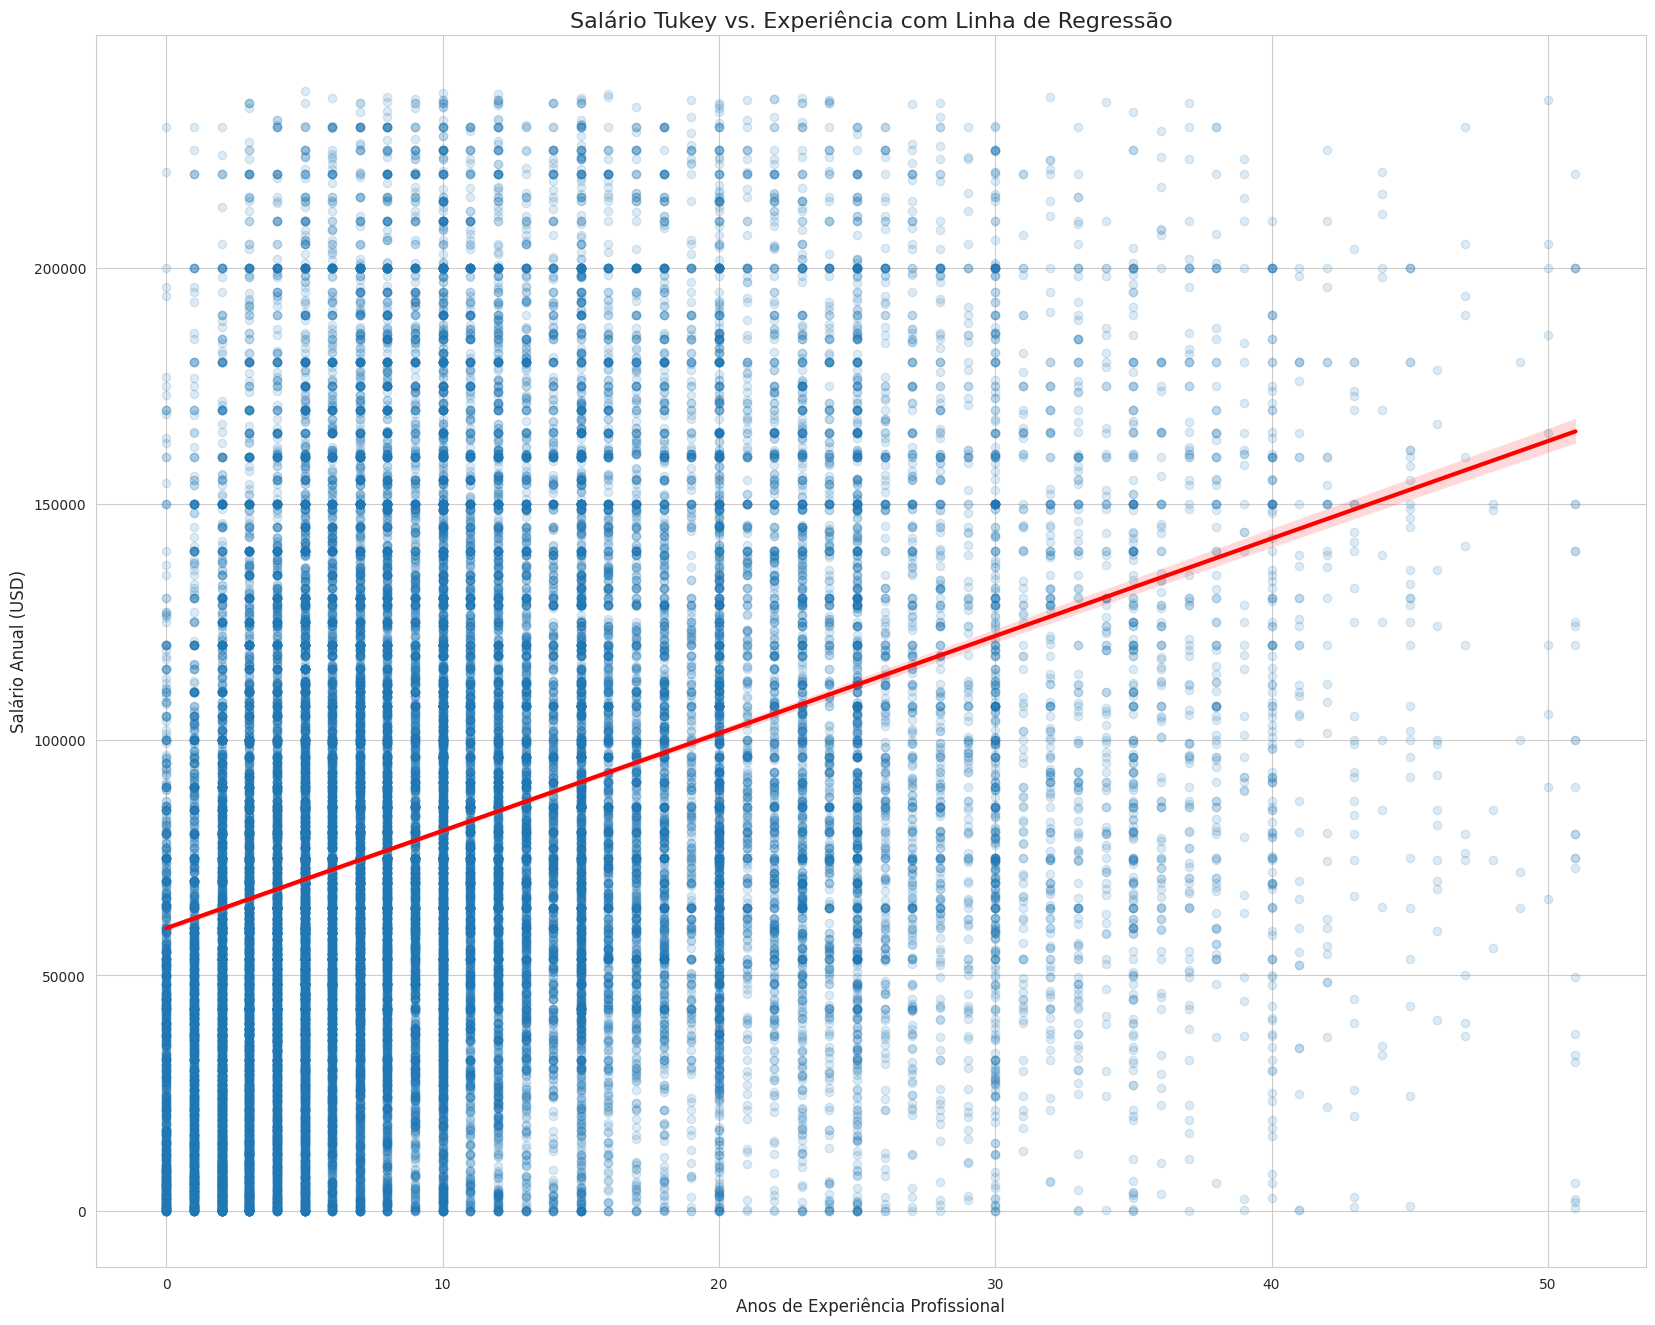

In [19]:
plt.figure(figsize=(20, 16))
sns.regplot(
    data=df_proc_tukey_salario, 
    x='YearsCodePro', 
    y='ConvertedCompYearly',
    scatter_kws={'alpha': 0.15}, 
    line_kws={'color': 'red', 'linewidth': 3}
)
plt.title('Salário Tukey vs. Experiência com Linha de Regressão', fontsize=16)
plt.xlabel('Anos de Experiência Profissional', fontsize=12)
plt.ylabel('Salário Anual (USD)', fontsize=12)
plt.grid(True)
plt.show()

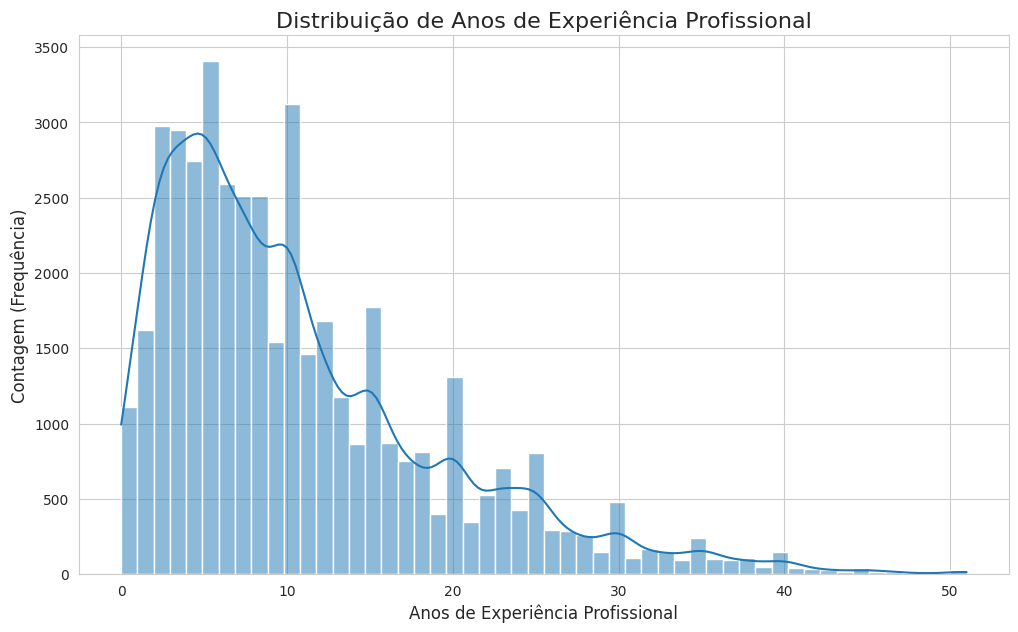

In [20]:
plt.figure(figsize=(12, 7))
sns.histplot(data=df_proc, x='YearsCodePro', bins=52, kde=True)
plt.title('Distribuição de Anos de Experiência Profissional', fontsize=16)
plt.xlabel('Anos de Experiência Profissional', fontsize=12)
plt.ylabel('Contagem (Frequência)', fontsize=12)
plt.show()

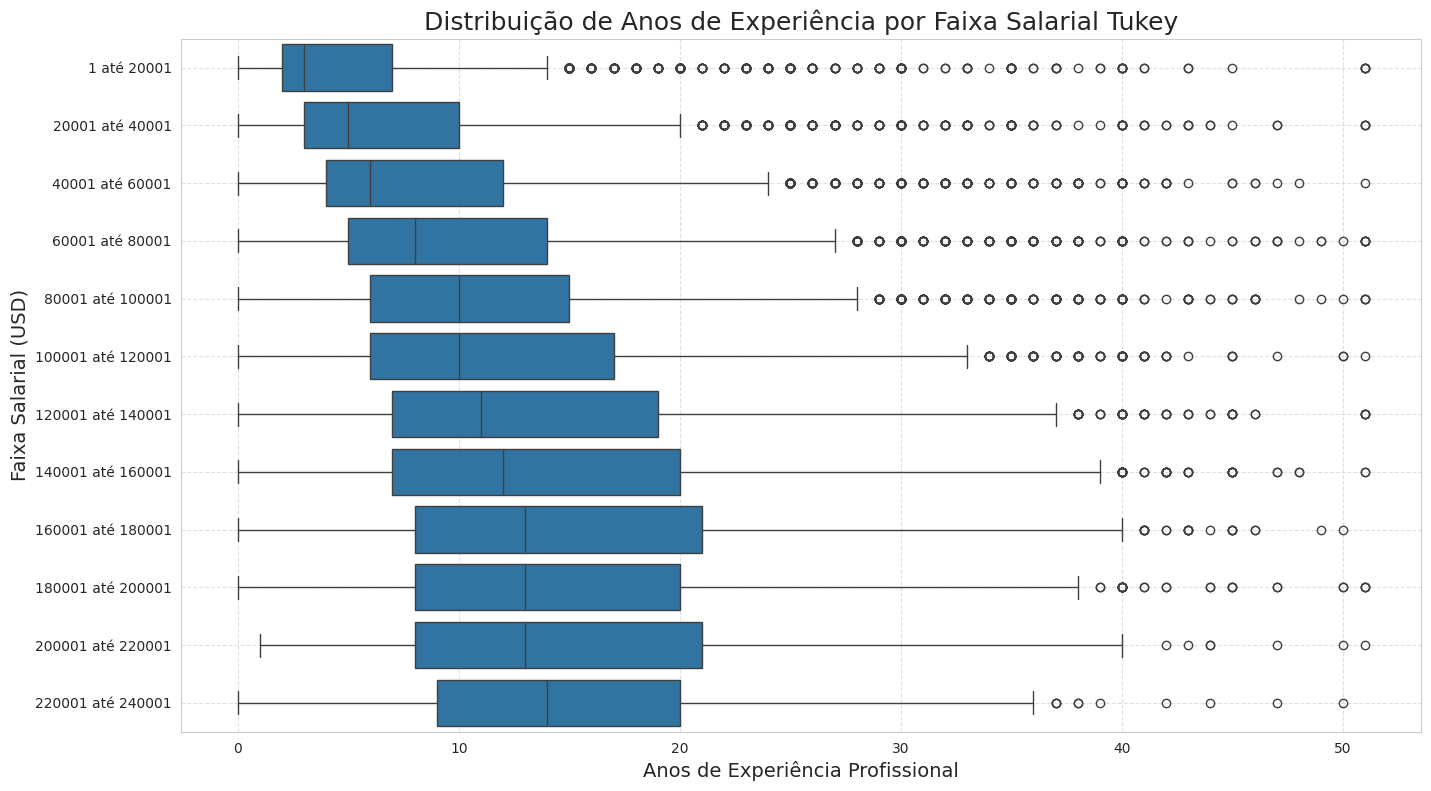

In [21]:
plt.figure(figsize=(16, 9))
sns.boxplot(
    data=df_proc_tukey_salario,
    x='YearsCodePro',
    y='ConvertedCompYearlyDisc',
    order=rotulos_dinamicos
)

plt.title('Distribuição de Anos de Experiência por Faixa Salarial Tukey', fontsize=18)
plt.xlabel('Anos de Experiência Profissional', fontsize=14)
plt.ylabel('Faixa Salarial (USD)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

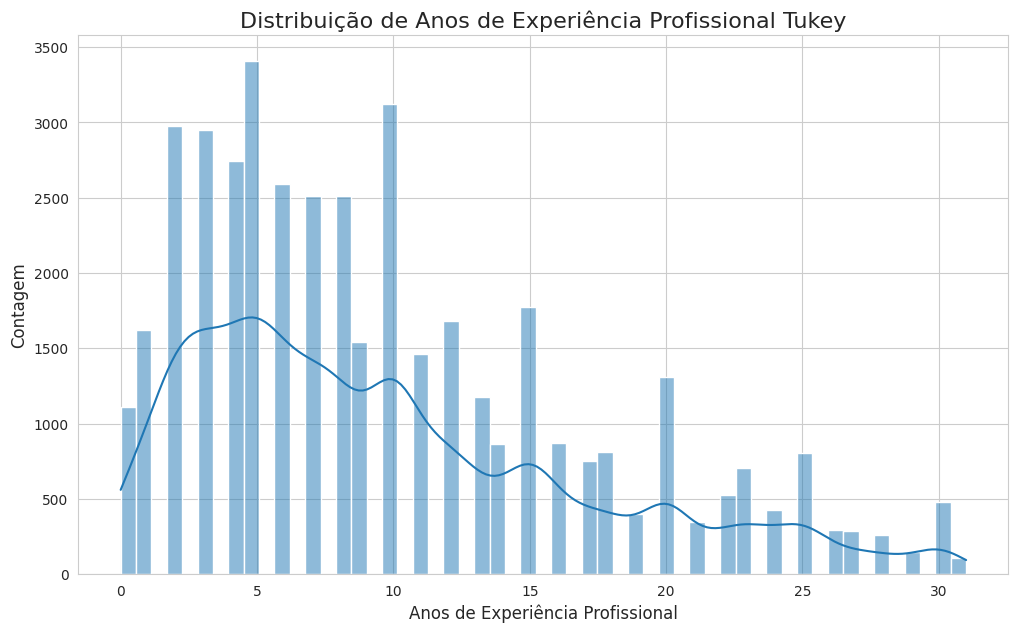

In [22]:
Q1 = df_proc['YearsCodePro'].quantile(0.25)
Q3 = df_proc['YearsCodePro'].quantile(0.75)
IQR = Q3 - Q1
limite_superior_tukey : float = Q3 + 1.5 * IQR
limite_inferior_tukey : float = Q1 - 1.5 * IQR
df_proc_tukey_anos : pd.DataFrame = df_proc[(df_proc['YearsCodePro'] <= limite_superior_tukey) & (df_proc['YearsCodePro'] >= limite_inferior_tukey)].copy()
plt.figure(figsize=(12, 7))
sns.histplot(data=df_proc_tukey_anos, x='YearsCodePro', kde=True)
plt.title('Distribuição de Anos de Experiência Profissional Tukey', fontsize=16)
plt.xlabel('Anos de Experiência Profissional', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.show()

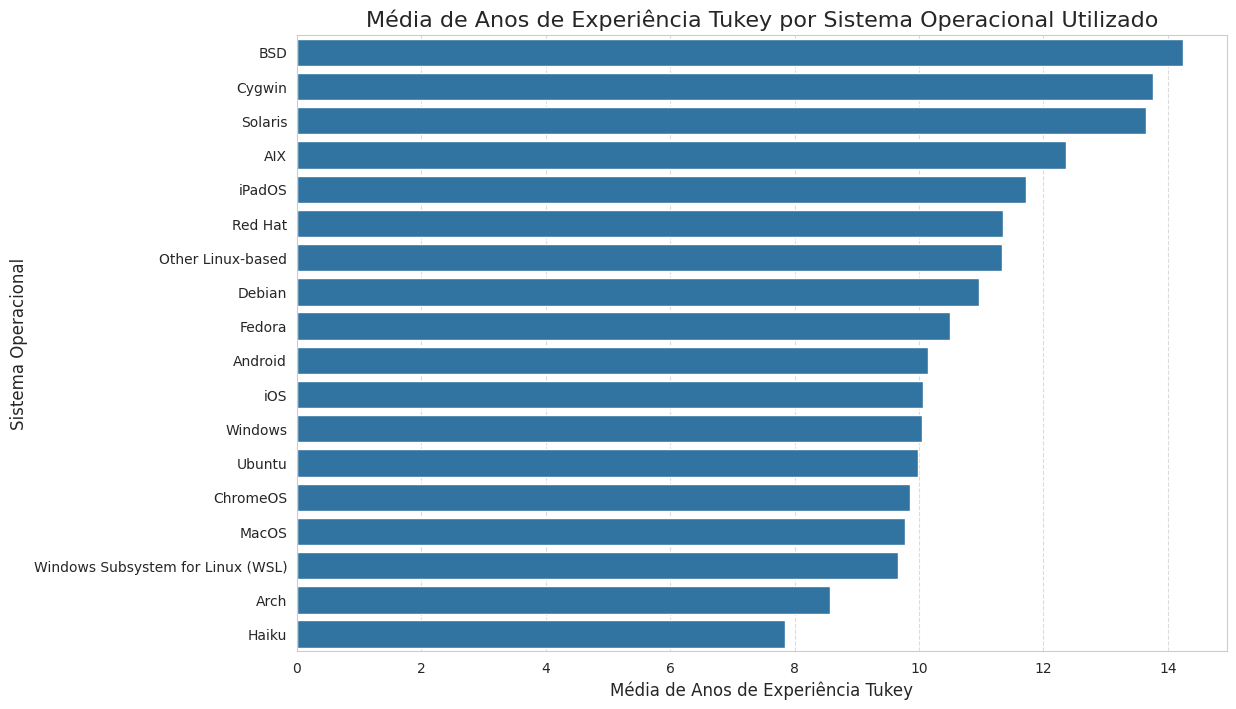

In [23]:
experiencia_media_por_so = {}
for so in lista_de_tecnologias:
    desenvolvedores_com_so = df_proc_tukey_anos[df_proc_tukey_anos[so]]
    media_exp = desenvolvedores_com_so['YearsCodePro'].mean()
    experiencia_media_por_so[so] = media_exp
experiencia_media_series = pd.Series(experiencia_media_por_so).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
ax_exp = sns.barplot(x=experiencia_media_series.values, y=experiencia_media_series.index, orient='h')
plt.title('Média de Anos de Experiência Tukey por Sistema Operacional Utilizado', fontsize=16)
plt.xlabel('Média de Anos de Experiência Tukey', fontsize=12)
plt.ylabel('Sistema Operacional', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

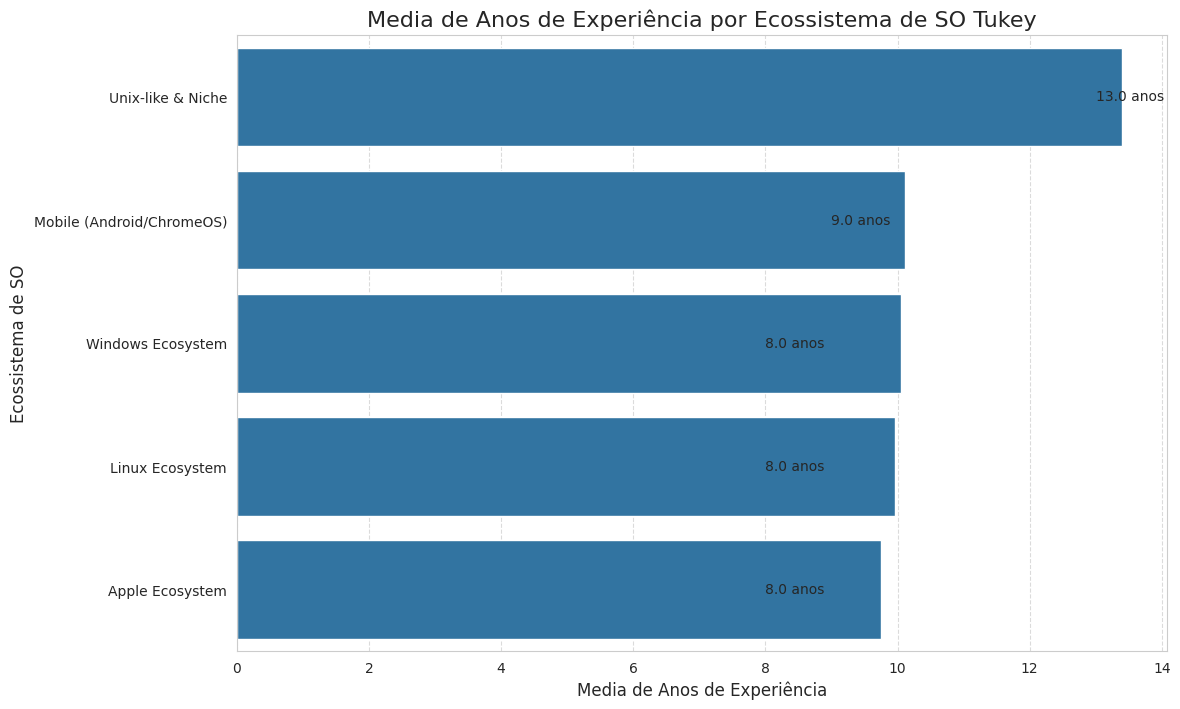

In [24]:
experiencia_media_por_grupo = df_proc_tukey_anos.explode('OpSysProfessionalGroup').groupby('OpSysProfessionalGroup')['YearsCodePro'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=experiencia_media_por_grupo.values, y=experiencia_media_por_grupo.index, orient='h')
plt.title('Media de Anos de Experiência por Ecossistema de SO Tukey', fontsize=16)
plt.xlabel('Media de Anos de Experiência', fontsize=12)
plt.ylabel('Ecossistema de SO', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
for index, value in enumerate(experiencia_mediana_por_grupo):
    label = f'{value:.1f} anos'
    plt.text(value, index, label, va='center')

plt.show()

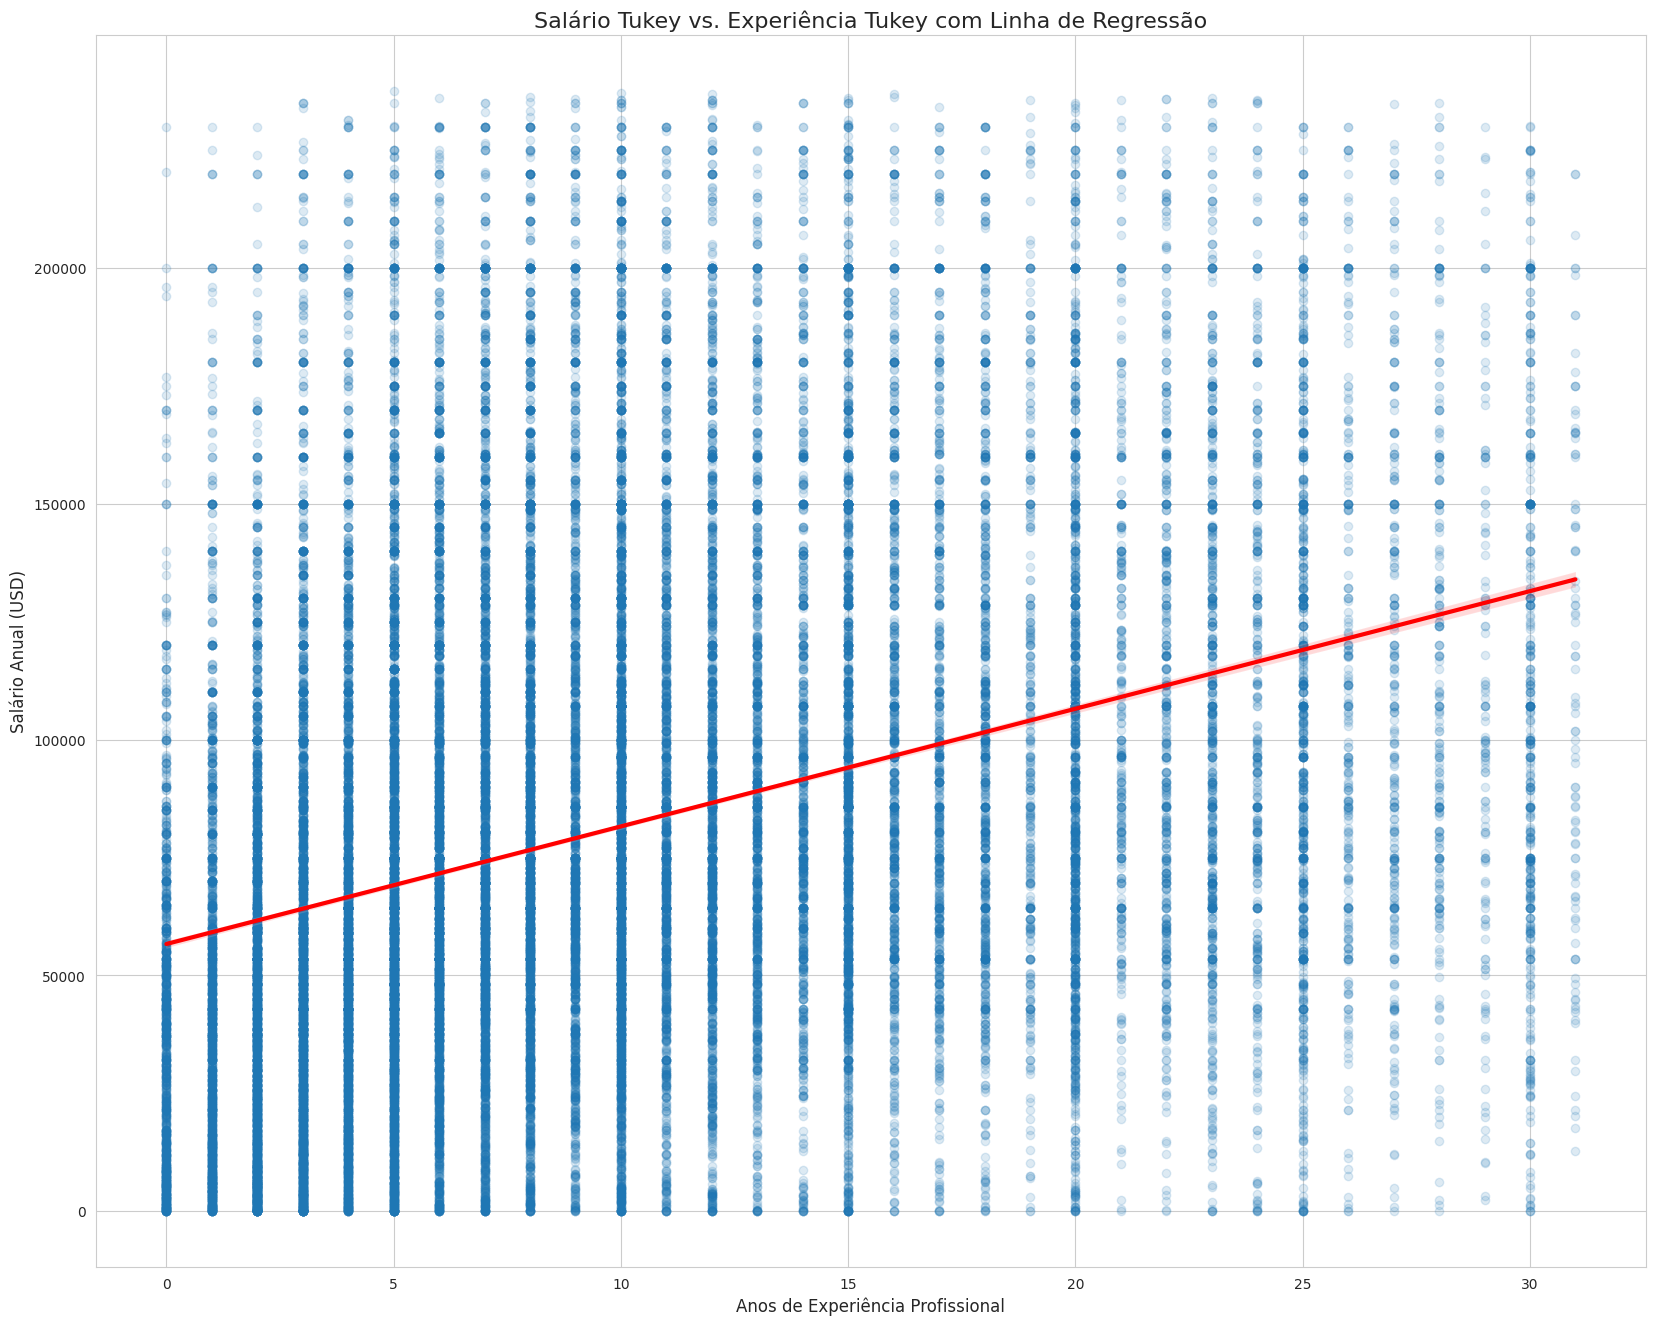

In [25]:
plt.figure(figsize=(20, 16))
# A função regplot faz tudo de uma vez
# scatter_kws={'alpha': 0.2} deixa os pontos transparentes para lidar com a sobreposição
# line_kws={'color': 'red'} customiza a cor da linha
df_proc_tukey_salario_anos : pd.DataFrame = df_proc_tukey_salario[(df_proc_tukey_salario['YearsCodePro'] <= limite_superior_tukey) & (df_proc_tukey_salario['YearsCodePro'] >= limite_inferior_tukey)].copy()
sns.regplot(
    data=df_proc_tukey_salario_anos, 
    x='YearsCodePro', 
    y='ConvertedCompYearly',
    scatter_kws={'alpha': 0.15}, 
    line_kws={'color': 'red', 'linewidth': 3}
)
plt.title('Salário Tukey vs. Experiência Tukey com Linha de Regressão', fontsize=16)
plt.xlabel('Anos de Experiência Profissional', fontsize=12)
plt.ylabel('Salário Anual (USD)', fontsize=12)
plt.grid(True)
plt.show()

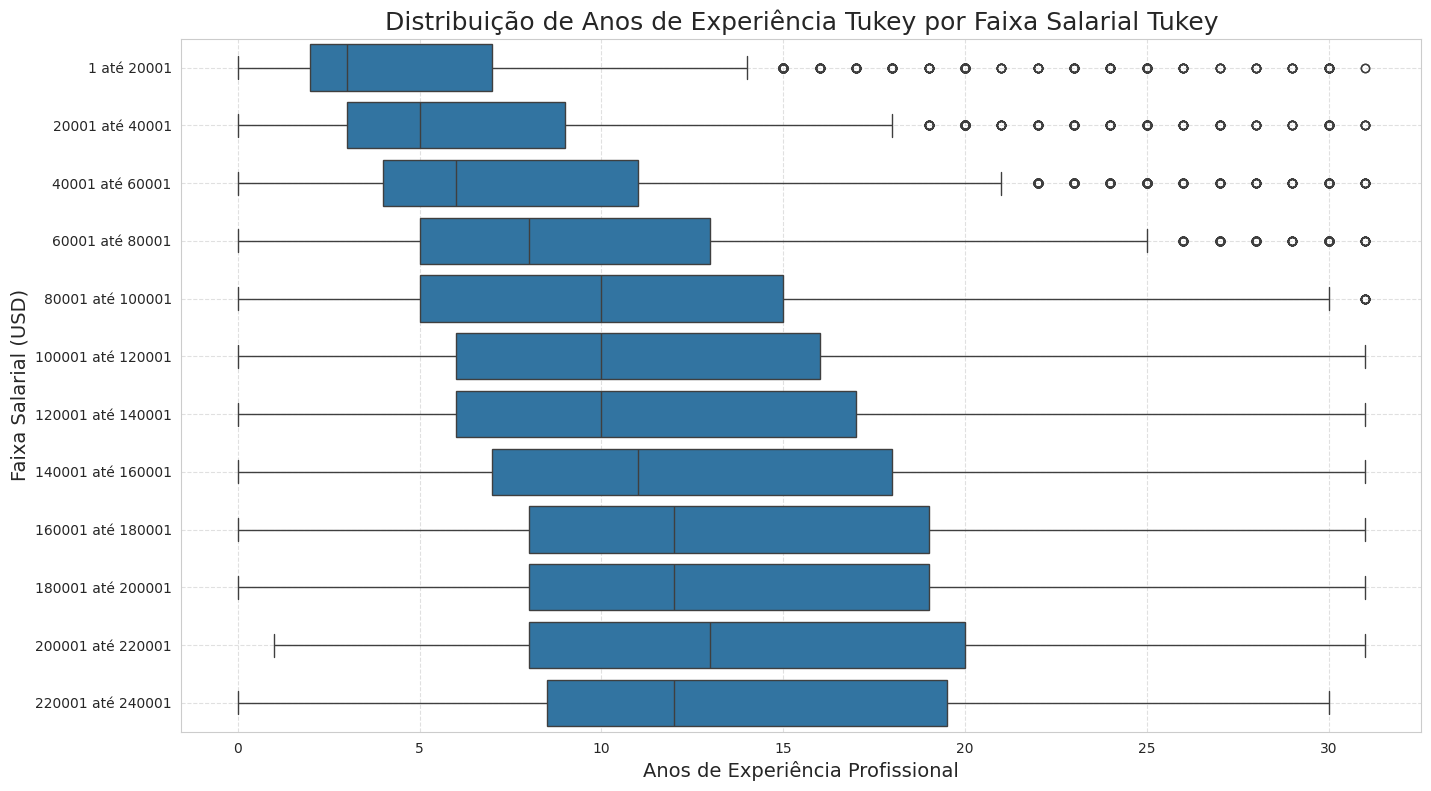

In [26]:
plt.figure(figsize=(16, 9))
sns.boxplot(
    data=df_proc_tukey_salario_anos,
    x='YearsCodePro',
    y='ConvertedCompYearlyDisc',
    order=rotulos_dinamicos
)

plt.title('Distribuição de Anos de Experiência Tukey por Faixa Salarial Tukey', fontsize=18)
plt.xlabel('Anos de Experiência Profissional', fontsize=14)
plt.ylabel('Faixa Salarial (USD)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [27]:
print(f"Tamanho do DataFrame antes do 'explode': {len(df_proc_tukey_salario_anos)}")
df_proc_tukey_salario_anos_exploded = df_proc_tukey_salario_anos.explode('OpSysProfessionalList')
print(f"Tamanho do DataFrame depois do 'explode': {len(df_proc_tukey_salario_anos_exploded)}")

Tamanho do DataFrame antes do 'explode': 40705
Tamanho do DataFrame depois do 'explode': 76018


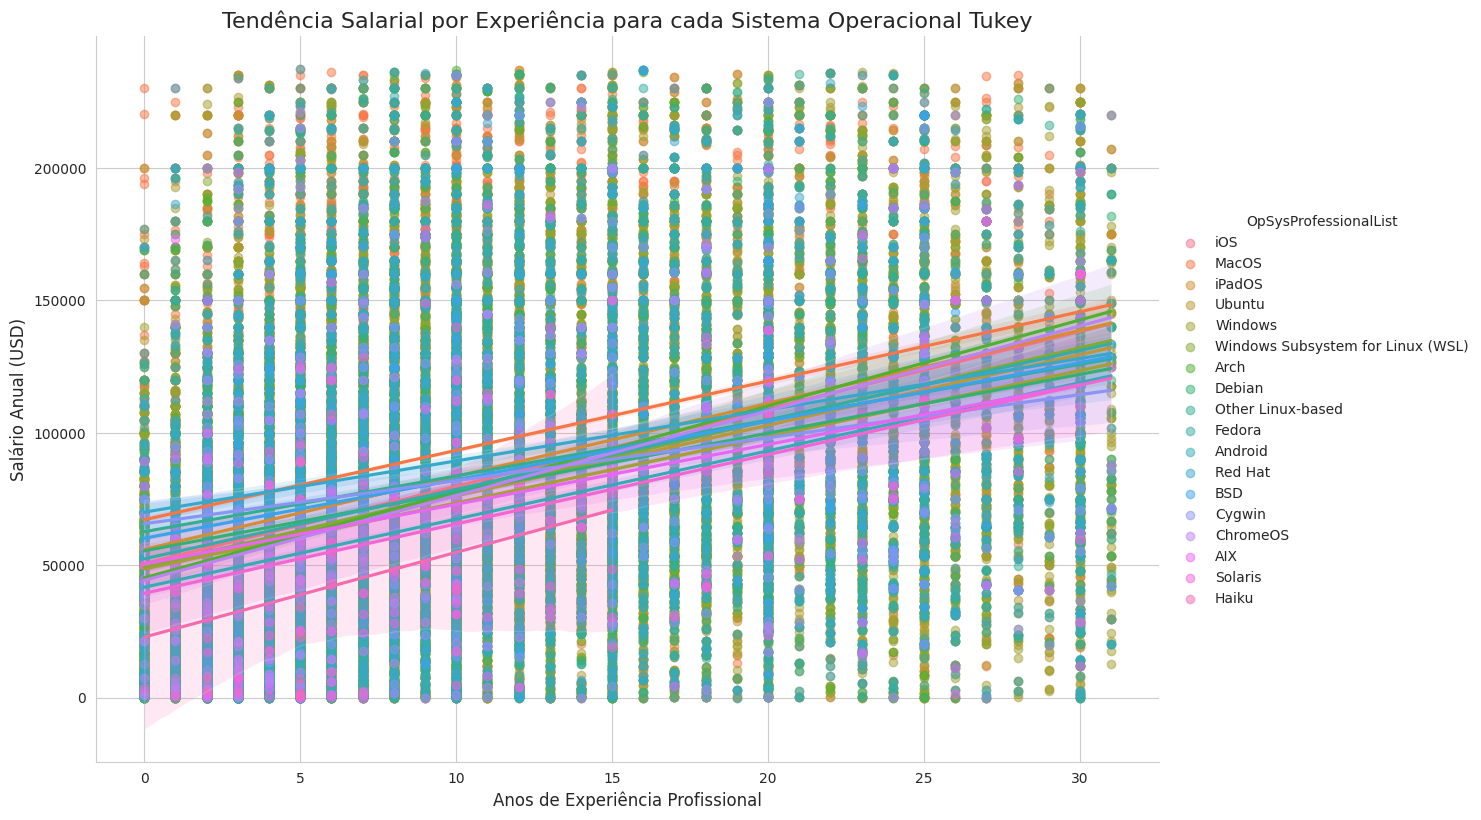

In [28]:
sns.lmplot(
    data=df_proc_tukey_salario_anos_exploded,
    x='YearsCodePro',
    y='ConvertedCompYearly',
    hue='OpSysProfessionalList',  # <-- A MÁGICA ACONTECE AQUI
    height=8,
    aspect=1.5,
    scatter_kws={'alpha': 0.5}
)

plt.title('Tendência Salarial por Experiência para cada Sistema Operacional Tukey', fontsize=16)
plt.xlabel('Anos de Experiência Profissional', fontsize=12)
plt.ylabel('Salário Anual (USD)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.show()

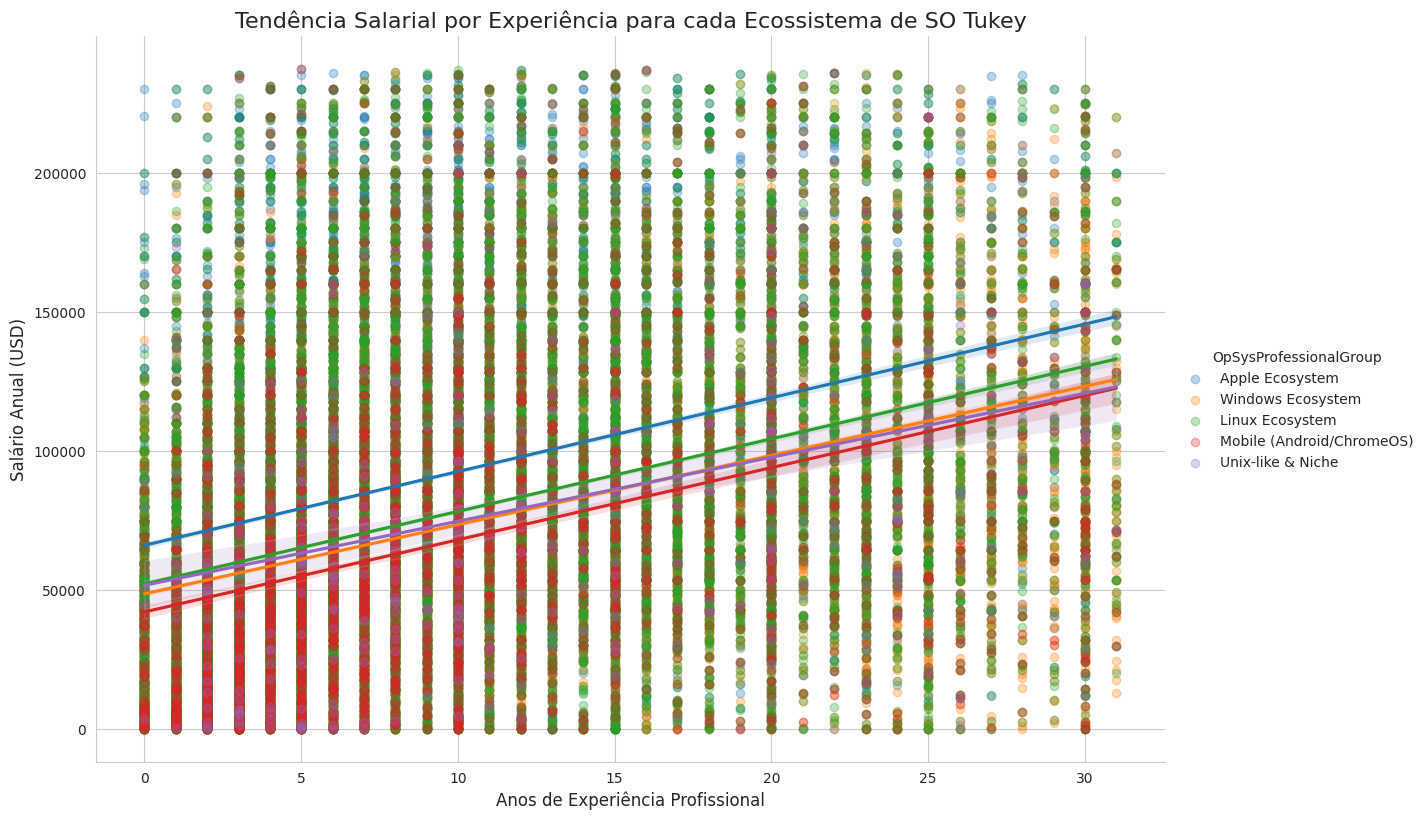

In [29]:
df_proc_tukey_salario_anos_exploded_os = df_proc_tukey_salario_anos.explode('OpSysProfessionalGroup')
sns.lmplot(
    data=df_proc_tukey_salario_anos_exploded_os,
    x='YearsCodePro',
    y='ConvertedCompYearly',
    hue='OpSysProfessionalGroup',
    height=8,
    aspect=1.5,
    scatter_kws={'alpha': 0.3}
)

plt.title('Tendência Salarial por Experiência para cada Ecossistema de SO Tukey', fontsize=16)
plt.xlabel('Anos de Experiência Profissional', fontsize=12)
plt.ylabel('Salário Anual (USD)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.show()

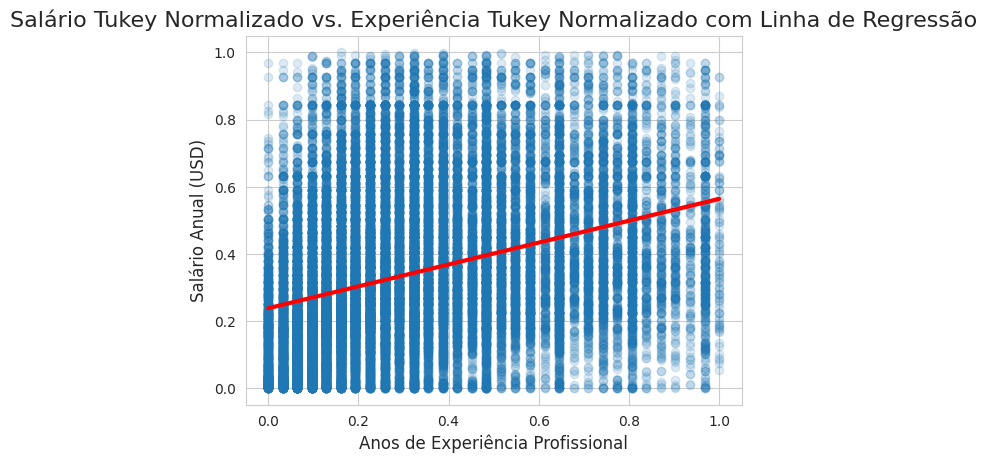

In [30]:
df_proc_tukey_salario_anos_normalizados : pd.DataFrame = df_proc_tukey_salario_anos.copy()
colunas_para_normalizar : list[str] = ['YearsCodePro', 'ConvertedCompYearly']
scaler = skl.preprocessing.MinMaxScaler()
df_proc_tukey_salario_anos_normalizados[colunas_para_normalizar] = scaler.fit_transform(df_proc_tukey_salario_anos_normalizados[colunas_para_normalizar])
sns.regplot(
    data=df_proc_tukey_salario_anos_normalizados, 
    x='YearsCodePro', 
    y='ConvertedCompYearly',
    scatter_kws={'alpha': 0.15}, 
    line_kws={'color': 'red', 'linewidth': 3}
)
plt.title('Salário Tukey Normalizado vs. Experiência Tukey Normalizado com Linha de Regressão', fontsize=16)
plt.xlabel('Anos de Experiência Profissional', fontsize=12)
plt.ylabel('Salário Anual (USD)', fontsize=12)
plt.grid(True)
plt.show()

### Análise Estatística e Testes de Hipótese

Após o pré-processamento e a análise descritiva inicial, esta seção utiliza testes estatísticos formais para validar as tendências observadas. O objetivo é determinar se essas tendências são estatisticamente significativas ou se podem ser atribuídas ao acaso.

* **Teste 1: Relação entre Anos de Experiência e Salário (Correlação e Regressão)**
    * **Pergunta:** Existe uma associação estatisticamente significativa e positiva entre o tempo de experiência profissional (`YearsCodePro`) e o salário anual (`ConvertedCompYearly`)?
    * **Hipóteses:**
        * **Hipótese Nula ($H_0$):** Não há relação linear entre anos de experiência e salário; o coeficiente de correlação é zero.
        * **Hipótese Alternativa ($H_1$):** Há uma relação linear positiva entre anos de experiência e salário.
    * **Método:** Para avaliar esta relação, foram empregados dois métodos: o **Teste de Correlação de Pearson** para medir a força da associação e um **Modelo de Regressão Linear Simples** para quantificar o efeito.
    * **Resultado:** O teste de correlação revelou um coeficiente positivo e moderado, com um p-valor extremamente baixo (p < 0.05). De forma consistente, o modelo de regressão mostrou que o coeficiente para `YearsCodePro` era positivo e também estatisticamente significativo (p < 0.05).
    * **Conclusão:** Ambos os testes nos levaram a **rejeitar a Hipótese Nula**. Isso confirma com significância estatística que, quanto maior o número de anos de experiência profissional, maior tende a ser o salário, e essa relação não é fruto do acaso.

* **Teste 2: Análise da Influência do Sistema Operacional no Salário (ANOVA)**
    * **Pergunta:** A escolha do sistema operacional profissional (ex: Windows, MacOS, Linux-based) influencia a média salarial dos desenvolvedores?
    * **Hipóteses:**
        * **Hipótese Nula ($H_0$):** As médias salariais populacionais para todos os grupos de SO são iguais (ex: $\mu_{Windows} = \mu_{MacOS} = \mu_{Linux}$).
        * **Hipótese Alternativa ($H_1$):** Pelo menos uma das médias salariais populacionais é diferente das outras.
    * **Método:** Foi utilizada a **Análise de Variância (ANOVA)**, o teste estatístico ideal para comparar as médias de uma variável numérica contínua (salário) entre três ou mais grupos categóricos (sistemas operacionais).
    * **Resultado:** O teste resultou em um p-valor muito baixo (p < 0.05), o que nos levou a **rejeitar a Hipótese Nula**.
    * **Conclusão:** Existem diferenças estatisticamente significativas nos salários entre os usuários dos diferentes sistemas operacionais, validando a observação de que a escolha da plataforma de trabalho está associada a diferentes níveis de remuneração.
* **Teste 3: Comparação das Distribuições Salariais entre Usuários de Windows e Linux (Mann-Whitney U)**
    * **Pergunta:** A distribuição de salários entre desenvolvedores que usam Windows é diferente da distribuição para aqueles que usam Linux?
    * **Hipóteses:**
        * **Hipótese Nula ($H_0$):** As distribuições de salário dos grupos Windows e Linux são iguais.
        * **Hipótese Alternativa ($H_1$):** As distribuições de salário dos grupos Windows e Linux são diferentes.
    * **Método:** Foi utilizado o **Teste Mann-Whitney U**, um teste não-paramétrico ideal para comparar duas distribuições independentes, especialmente quando os dados não seguem uma distribuição normal, como é o caso dos salários.
    * **Resultado:** O teste produziu um p-valor muito baixo (p < 0.05).
    * **Conclusão:** **Rejeitamos a Hipótese Nula**. Existem evidências estatísticas para afirmar que a distribuição de salários dos desenvolvedores que usam Windows é significativamente diferente daquela dos que usam Linux.

In [31]:
print("--- Executando o Teste de Correlação de Pearson ---")
experiencia = df_proc_tukey_salario_anos['YearsCodePro']
salario = df_proc_tukey_salario_anos['ConvertedCompYearly']
correlation_coefficient, p_value = scipy.stats.pearsonr(experiencia, salario)
print(f"Coeficiente de Correlação de Pearson (r): {correlation_coefficient:.4f}")
print(f"P-valor: {p_value:.4f}") # O p-valor será extremamente pequeno
alpha = 0.05
if p_value < alpha:
    print("\nConclusão: O p-valor é menor que alpha. Rejeitamos a Hipótese Nula.")
    print(f">> Existe uma correlação estatisticamente significativa e positiva entre experiência e salário.")
else:
    print("\nConclusão: O p-valor é maior que alpha. Falhamos em rejeitar a Hipótese Nula.")
    print(">> Não encontramos evidências de uma correlação estatisticamente significativa.")

--- Executando o Teste de Correlação de Pearson ---
Coeficiente de Correlação de Pearson (r): 0.3401
P-valor: 0.0000

Conclusão: O p-valor é menor que alpha. Rejeitamos a Hipótese Nula.
>> Existe uma correlação estatisticamente significativa e positiva entre experiência e salário.


In [32]:
Y = df_proc_tukey_salario_anos['ConvertedCompYearly']
X = df_proc_tukey_salario_anos['YearsCodePro']
X = sm.add_constant(X)
modelo = sm.OLS(Y, X).fit()
print(modelo.summary())

r_squared = modelo.rsquared
intercepto = modelo.params['const']
coef_experiencia = modelo.params['YearsCodePro']
p_valor_experiencia = modelo.pvalues['YearsCodePro']
print(f"\n1. QUALIDADE GERAL DO MODELO:")
print(f"   - O modelo consegue explicar {r_squared:.1%} da variação nos salários (R-squared = {r_squared:.3f}).")
print("     Isso significa que a experiência é um fator relevante, mas outros elementos (tecnologia, país, etc.) também são importantes.")
print(f"\n2. RELAÇÃO PRINCIPAL (Salário vs. Experiência):")
print(f"   - A relação encontrada é ESTATISTICAMENTE SIGNIFICATIVA, pois o p-valor ({p_valor_experiencia:.3f}) é menor que 0.05.")
print("     Isso confirma que a ligação entre experiência e salário não é fruto do acaso.")
print(f"\n3. EFEITO PRÁTICO (A Equação do Modelo):")
print(f"   - Salário Previsto = ${intercepto:,.0f} + (${coef_experiencia:,.0f} * Anos de Experiência)")
print(f"   - O modelo prevê um salário inicial de, em média, ${intercepto:,.0f} para um desenvolvedor com 0 anos de experiência.")
print(f"   - Para cada 1 ano adicional de experiência, o salário tende a aumentar, em média, ${coef_experiencia:,.0f}.")
print("="*60)

                             OLS Regression Results                            
Dep. Variable:     ConvertedCompYearly   R-squared:                       0.116
Model:                             OLS   Adj. R-squared:                  0.116
Method:                  Least Squares   F-statistic:                     5322.
Date:                 Fri, 08 Aug 2025   Prob (F-statistic):               0.00
Time:                         11:36:25   Log-Likelihood:            -4.9781e+05
No. Observations:                40705   AIC:                         9.956e+05
Df Residuals:                    40703   BIC:                         9.956e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5.666e+04    410.834    

In [33]:
so_grupos : list[str]= ['Linux Ecosystem', 'Windows Ecosystem', 'Apple Ecosystem', 'Mobile (Android/ChromeOS)', 'Unix-like & Niche']
grupos_de_salario: list[pd.Series] = []
for so in so_grupos:
    salarios_do_grupo = df_proc_tukey_salario_anos_exploded_os[df_proc_tukey_salario_anos_exploded_os['OpSysProfessionalGroup'] == so]['ConvertedCompYearly']
    grupos_de_salario.append(salarios_do_grupo)
f_statistic, p_value = scipy.stats.f_oneway(*grupos_de_salario)
print(f"Estatística F calculada: {f_statistic:.4f}")
print(f"P-valor calculado: {p_value:.4f}")
alpha = 0.05
if p_value < alpha:
    print(f"O p-valor ({p_value}) é MENOR que o nosso nível de significância ({alpha}).")
    print(">> Conclusão: Rejeitamos a Hipótese Nula (H0).")
    print(">> Existem evidências estatísticas para afirmar que há uma diferença significativa nos salários médios entre os entre os grupos de SO.")
else:
    print(f"O p-valor ({p_value}) é MAIOR ou IGUAL ao nosso nível de significância ({alpha}).")
    print(">> Conclusão: Falhamos em rejeitar a Hipótese Nula (H0).")
    print(">> Não temos evidências estatísticas suficientes para afirmar que há uma diferença nos salários médios entre os grupos de SO.")

Estatística F calculada: 345.9458
P-valor calculado: 0.0000
O p-valor (4.167192678757464e-295) é MENOR que o nosso nível de significância (0.05).
>> Conclusão: Rejeitamos a Hipótese Nula (H0).
>> Existem evidências estatísticas para afirmar que há uma diferença significativa nos salários médios entre os entre os grupos de SO.


In [34]:
salarios_windows = df_proc_tukey_salario_anos_exploded_os[df_proc_tukey_salario_anos_exploded_os['OpSysProfessionalGroup'] == 'Windows Ecosystem']['ConvertedCompYearly']
salarios_linux = df_proc_tukey_salario_anos_exploded_os[df_proc_tukey_salario_anos_exploded_os['OpSysProfessionalGroup'] == 'Linux Ecosystem']['ConvertedCompYearly']
u_statistic, p_value_mw = scipy.stats.mannwhitneyu(salarios_windows, salarios_linux, alternative='two-sided')

print(f"\nEstatística U calculada: {u_statistic:.4f}")
print(f"P-valor calculado: {p_value_mw:.4f}")

if p_value_mw < alpha:
    print(f"\nO p-valor ({p_value_mw:.4f}) é MENOR que o nosso nível de significância ({alpha}).")
    print(">> Conclusão: Rejeitamos a Hipótese Nula (H0).")
    print(">> Existem evidências estatísticas para afirmar que há uma diferença significativa na distribuição de salários entre os usuários de Windows e Linux.")
else:
    print(f"\nO p-valor ({p_value_mw:.4f}) é MAIOR ou IGUAL ao nosso nível de significância ({alpha}).")
    print(">> Conclusão: Falhamos em rejeitar a Hipótese Nula (H0).")
    print(">> Não temos evidências estatísticas suficientes para afirmar que a distribuição de salários entre os usuários de Windows e Linux é diferente.")
print("="*50)


Estatística U calculada: 200246507.5000
P-valor calculado: 0.0000

O p-valor (0.0000) é MENOR que o nosso nível de significância (0.05).
>> Conclusão: Rejeitamos a Hipótese Nula (H0).
>> Existem evidências estatísticas para afirmar que há uma diferença significativa na distribuição de salários entre os usuários de Windows e Linux.
